# Water pump data predictions - Heuristics

## Group:
    
- Isaac Gonzales Vizcarra
- Ibrahim Sobh
- Anthony Siampiringue


## Dataset:
    https://www.kaggle.com/datasets/nphantawee/pump-sensor-data
        
## Description:
- Data driven prediction models of water pump sensor.
 

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [81]:
data = pd.read_csv("../../dataset/sensor.csv", parse_dates=["timestamp"], index_col="timestamp")
data_df = data.copy()
data_df.head()

Unnamed: 0  sensor_00  sensor_01  sensor_02  sensor_03  \
timestamp                                                                     
2018-04-01 00:00:00           0   2.465394   47.09201    53.2118  46.310760   
2018-04-01 00:01:00           1   2.465394   47.09201    53.2118  46.310760   
2018-04-01 00:02:00           2   2.444734   47.35243    53.2118  46.397570   
2018-04-01 00:03:00           3   2.460474   47.09201    53.1684  46.397568   
2018-04-01 00:04:00           4   2.445718   47.13541    53.2118  46.397568   

                     sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  \
timestamp                                                                    
2018-04-01 00:00:00   634.3750   76.45975   13.41146   16.13136   15.56713   
2018-04-01 00:01:00   634.3750   76.45975   13.41146   16.13136   15.56713   
2018-04-01 00:02:00   638.8889   73.54598   13.32465   16.03733   15.61777   
2018-04-01 00:03:00   628.1250   76.98898   13.31742   16.24711   15.69734   
2018-04-01 00:04:00   636.4583   76.58897   13.35359   16.21094   15.69734   

                     ...  sensor_43  sensor_44  sensor_45  sensor_46  \
timestamp            ...                                               
2018-04-01 00:00:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:01:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:02:00  ...   41.66666  39.351852   65.39352   51.21528   
2018-04-01 00:03:00  ...   40.88541  39.062500   64.81481   51.21528   
2018-04-01 00:04:00  ...   41.40625  38.773150   65.10416   51.79398   

                     sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
timestamp                                                                    
2018-04-01 00:00:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:01:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:02:00  38.194443   155.9606   67.12963   241.3194   203.7037   
2018-04-01 00:03:00  38.194440   155.9606   66.84028   240.4514   203.1250   
2018-04-01 00:04:00  38.773150   158.2755   66.55093   242.1875   201.3889   

                     machine_status  
timestamp                            
2018-04-01 00:00:00          NORMAL  
2018-04-01 00:01:00          NORMAL  
2018-04-01 00:02:00          NORMAL  
2018-04-01 00:03:00          NORMAL  
2018-04-01 00:04:00          NORMAL  

[5 rows x 54 columns]

## Pump nomalies

In [82]:
data_df['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [83]:
data_df["machine_status"].value_counts()
data_df["machine_status"][data_df["machine_status"] == "BROKEN"]="RECOVERING"



In [84]:
from sklearn.preprocessing import LabelEncoder

encod = LabelEncoder()
encod.fit(data_df['machine_status'])

data_df_encod = data_df.copy()
data_df_encod['machine_status'] = encod.transform(data_df_encod['machine_status'])
data_df_encod.drop(columns=['Unnamed: 0'], inplace=True)
data_df_encod = data_df_encod.bfill()

data_df_encod.head()


sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
timestamp                                                                    
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
timestamp                                                                    
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_43  sensor_44  sensor_45  sensor_46  \
timestamp            ...                                               
2018-04-01 00:00:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:01:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:02:00  ...   41.66666  39.351852   65.39352   51.21528   
2018-04-01 00:03:00  ...   40.88541  39.062500   64.81481   51.21528   
2018-04-01 00:04:00  ...   41.40625  38.773150   65.10416   51.79398   

                     sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
timestamp                                                                    
2018-04-01 00:00:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:01:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:02:00  38.194443   155.9606   67.12963   241.3194   203.7037   
2018-04-01 00:03:00  38.194440   155.9606   66.84028   240.4514   203.1250   
2018-04-01 00:04:00  38.773150   158.2755   66.55093   242.1875   201.3889   

                     machine_status  
timestamp                            
2018-04-01 00:00:00               0  
2018-04-01 00:01:00               0  
2018-04-01 00:02:00               0  
2018-04-01 00:03:00               0  
2018-04-01 00:04:00               0  

[5 rows x 53 columns]

# Naive Approaches

## Detect anomalies using global mean

 ### On 7 Sensors : [ Those sensors are stationary, after testing them with adfuller ]
- ###  Sensor #00 - Sensor #01 - Sensor #02 - Sensor #04
- ### Sensor #10 - Sensor #42 - Sensor #49

### Preparation, Assesement and plotting Functions

In [85]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import  f1_score , confusion_matrix,classification_report, accuracy_score,recall_score,precision_score
plt.rcParams['figure.figsize'] = (18, 5)

sensors = ["sensor_00", "sensor_01", "sensor_02", "sensor_04",
           "sensor_10", "sensor_42", "sensor_49", "sensor_50"]      
results_df = pd.DataFrame(columns=['Sensor','Method','Accuracy','F1','Recall','Precision','FNR','FPR'])

def asses_method(y_true, y_pred):
    
    #Classification report
    print(classification_report(y_true, y_pred))
    
    # F1 score
    F1_score = f1_score(y_true, y_pred)*100
    print('F1-score: {:.2f}%'.format(F1_score))
    
    # Confusion matrix
    print('Confusion matrix:')
    cnf_matrix=confusion_matrix(y_true, y_pred)
    
    print(cnf_matrix)
    TP = cnf_matrix[0][0]
    FP = cnf_matrix[0][1]
    FN = cnf_matrix[1][0]
    TN = cnf_matrix[1][1]
    
    #False positive rate
    FPR = round(FP/(FP+TN)*100, 2)
    print('False Positive Rate:', FPR)

    # False negative rate
    FNR = round(FN/(TP+FN)*100, 2)
    print('False Negative Rate:', FNR)   
    
    # Accuracy
    ACC = round((TP+TN)/(TP+FP+FN+TN)*100, 2)
    
    F1 = round(f1_score(y_true, y_pred)*100, 2)
    Recall = round(recall_score(y_true, y_pred)*100, 2)
    Precision = round(precision_score(y_true, y_pred)*100, 2)

    return {'Accuracy':ACC, 'F1':F1,'Precision':Precision,'Recall':Recall,'FPR':FPR,'FNR':FNR}

def plot_sensor(sensor,data):
    plt.rcParams['figure.figsize'] = (18, 5)
    data[[sensor]].plot()
    plt.title(sensor)
    plt.legend(loc='best')
    plt.show()

def plot_cutoff(sensor,data,cutoff,lower_cutoff):
    plt.rcParams['figure.figsize'] = (18, 5)
    plt.plot(data[sensor])
    plt.fill_between(data.index, y1=cutoff,y2=lower_cutoff,
                 alpha=0.2, color='green', linestyle='--', linewidth=2)
    
def plot_sensor_reel_anomalies(sensor,data):
    fig=plt.figure(figsize=(18,5))
    ax=fig.add_subplot(1,1,1)
    ax.plot(data[[sensor]])
    outliers= data[data['machine_status']== 1][sensor]
    outliers.plot(marker='.', linestyle='none', c="orange")
    ax.set_title(sensor + " Reel Anomalies")
    ax.legend(loc='best',labels=[sensor,'Reel Anomalies'])
    plt.show()


def plot_outliers(sensor,data,upper_outliers,lower_outliers):
    fig=plt.figure(figsize=(18,5))
    ax=fig.add_subplot(1,1,1)
    ax.plot(data[[sensor]])
    upper_outliers.plot(marker='.', linestyle='none', c="g")
    lower_outliers.plot(marker='.', linestyle='none', c="r")
    ax.legend(loc='best', labels=[sensor,'Upper outliers', 'Lower outliers'])
    ax.set_title(sensor + ' Cutoff Detected Anomalies')
    plt.show()
    
        

### 01 - Compute the Global mean and Global standard deviation of the data

In [86]:
def apply_cutoff_method(sensor,data,upper_cutoff_threshold = 1, lower_cutoff_threshold =1):
    
    #plot original data
    plot_sensor(sensor,data)
    
    # Get Mean and STD
    mean = data[sensor].mean()
    std =  data[sensor].std()
    print(f"mean = {mean:.2f}, standard deviation = {std:.2f}")
    
    # Apply Cutoff
    cutoff = mean + upper_cutoff_threshold * std
    lower_cutoff=cutoff / lower_cutoff_threshold
    print(f"Cutoff value = {cutoff:.2f} , Lower cutoff value = {lower_cutoff:.2f}")
    
    # plot sensor data with cutoff
    plot_cutoff(sensor,data,cutoff,lower_cutoff)
    
    new_data=data.copy()
    new_data['cutoff_status'] = 0
    mask = (new_data[sensor]> cutoff) | (new_data[sensor]< lower_cutoff)
    new_data.loc[mask, 'cutoff_status'] = 1
    
    # detect and plot upper outliers
    outliers_u = new_data[new_data[sensor]> cutoff][sensor]
    
    #detect and plot lower outliers
    outliers_l = new_data[new_data[sensor]<lower_cutoff][sensor]

    plot_outliers(sensor,new_data,outliers_u,outliers_l)
    plot_sensor_reel_anomalies(sensor,new_data)
    
    anomalies= data[data['machine_status']== 1][sensor]
    intersection = (anomalies.index).intersection(outliers_u.index.union(outliers_l.index))
    anomalies_count =anomalies.size
    anomalies_detected =outliers_u.size+ outliers_l.size
    anomalies_detected_percentage =intersection.size*100/anomalies_count
    print('Anomalies:', anomalies_count)
    print('Anomalies by Cutoff :', anomalies_detected)
    print('% Anomalies detected: {:.2f}%'. format(anomalies_detected_percentage))

    print(new_data['cutoff_status'].values)
    
    assesements = asses_method(new_data['machine_status'].values,new_data['cutoff_status'].values)
    Accuracy=assesements['Accuracy']
    F1=assesements['F1']
    Recall=assesements['Recall']
    Precision=assesements['Precision']
    FNR=assesements['FNR']
    FPR=assesements['FPR']

    #Sensor','Method','Accuracy','F1','Recall','Precision','FNR','FPR'
    results_df.loc[len(results_df)] = [sensor,'Cutoff',Accuracy,F1,Recall,Precision,FNR,FPR]
    
    return new_data

results_df=results_df[(results_df.Method != 'Cutoff')]


In [87]:
# fill empty values with the mean of the sensor
for sensor in sensors:
    data_df_encod[sensor].fillna(data_df_encod[sensor].mean(), inplace=True)

sensor_00_data = data_df_encod[['sensor_00', 'machine_status']]
sensor_01_data = data_df_encod[['sensor_01', 'machine_status']]
sensor_02_data = data_df_encod[['sensor_02', 'machine_status']]
sensor_04_data = data_df_encod[['sensor_04', 'machine_status']]
sensor_10_data = data_df_encod[['sensor_10', 'machine_status']]
sensor_42_data = data_df_encod[['sensor_42', 'machine_status']]
sensor_49_data = data_df_encod[['sensor_49', 'machine_status']]
sensor_50_data = data_df_encod[['sensor_50', 'machine_status']]

### Sensor 00

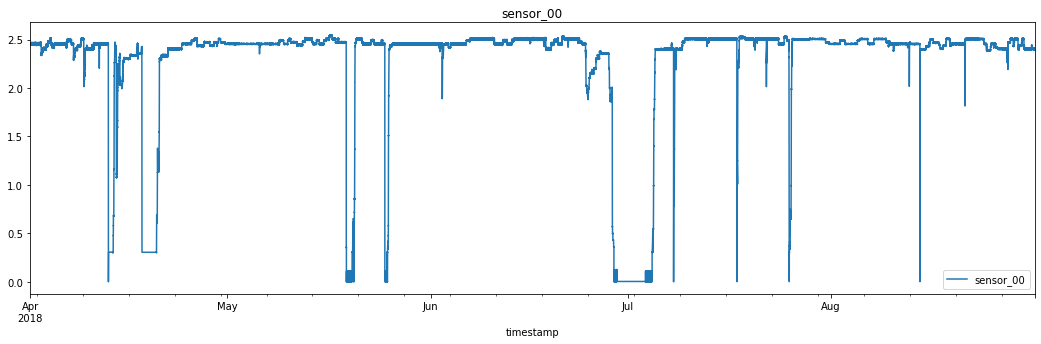

mean = 2.27, standard deviation = 0.62
Cutoff value = 2.58 , Lower cutoff value = 1.98


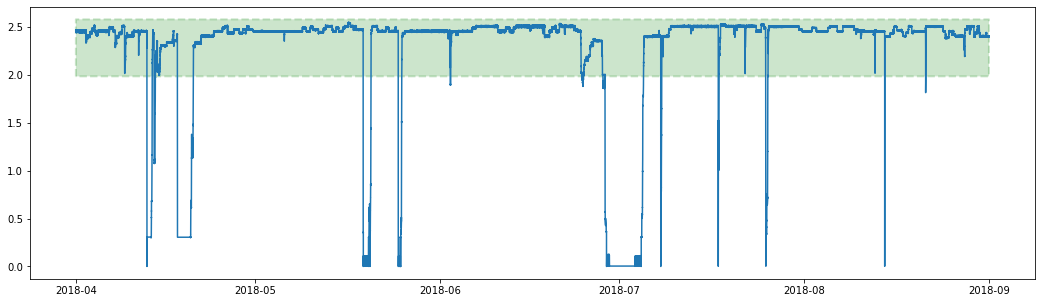

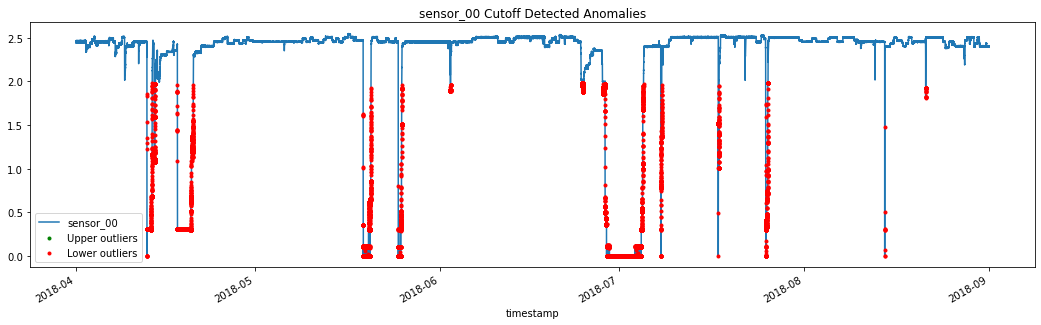

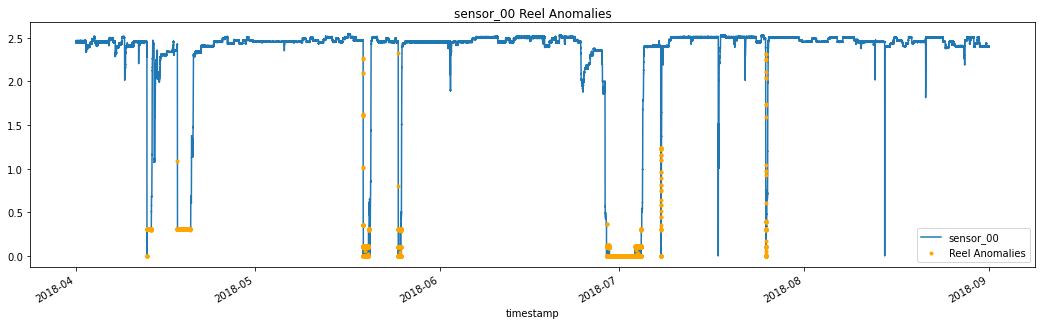

Anomalies: 14484
Anomalies by Cutoff : 19317
% Anomalies detected: 99.92%
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    205836
           1       0.75      1.00      0.86     14484

    accuracy                           0.98    220320
   macro avg       0.87      0.99      0.92    220320
weighted avg       0.98      0.98      0.98    220320

F1-score: 85.63%
Confusion matrix:
[[200991   4845]
 [    12  14472]]
False Positive Rate: 25.08
False Negative Rate: 0.01


In [88]:
cutoff_upper_threshold  = 0.5
cutoff_lower_thrershold = 1.3
cutoff_sensor_data_00=apply_cutoff_method('sensor_00',sensor_00_data,cutoff_upper_threshold,cutoff_lower_thrershold)

### Sensor 01

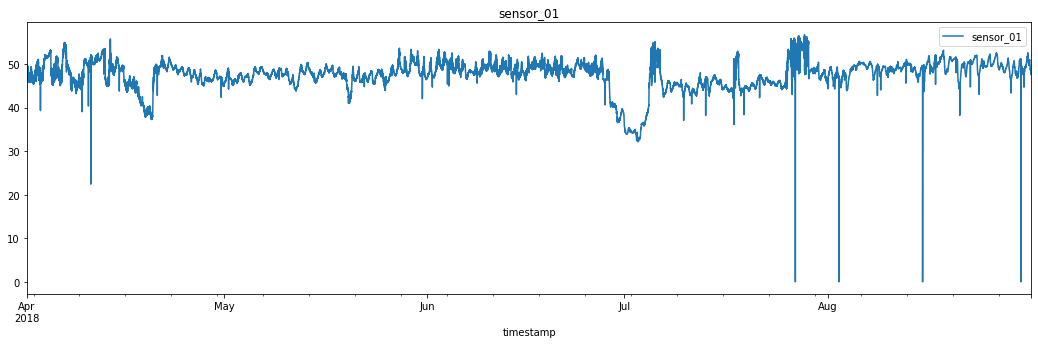

mean = 47.60, standard deviation = 3.30
Cutoff value = 56.84 , Lower cutoff value = 43.72


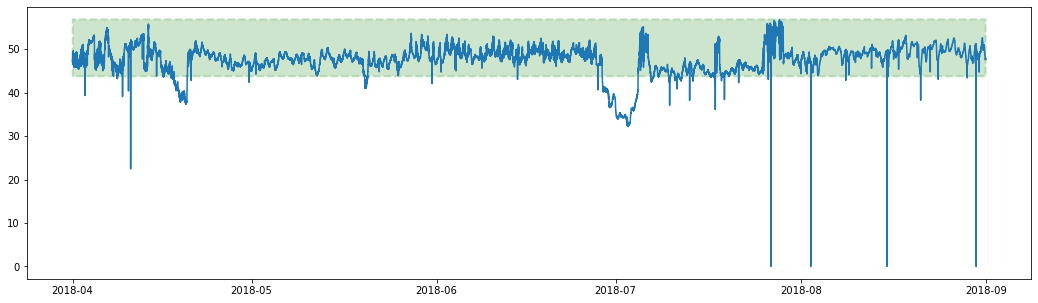

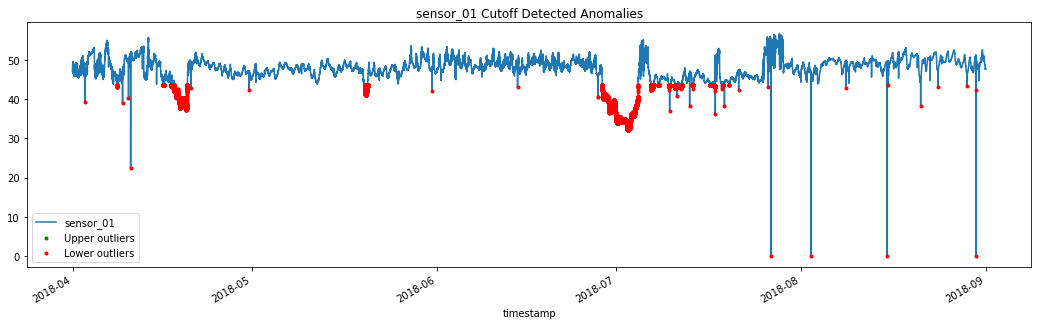

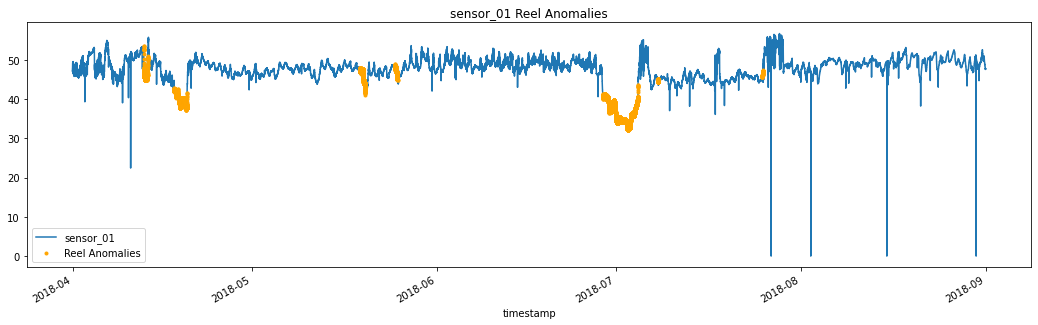

Anomalies: 14484
Anomalies by Cutoff : 16247
% Anomalies detected: 80.52%
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    205836
           1       0.72      0.81      0.76     14484

    accuracy                           0.97    220320
   macro avg       0.85      0.89      0.87    220320
weighted avg       0.97      0.97      0.97    220320

F1-score: 75.90%
Confusion matrix:
[[201252   4584]
 [  2821  11663]]
False Positive Rate: 28.21
False Negative Rate: 1.38


In [89]:
cutoff_upper_threshold  = 2.8
cutoff_lower_thrershold = 1.3
cutoff_sensor_data_01 =apply_cutoff_method('sensor_01',sensor_01_data,cutoff_upper_threshold,cutoff_lower_thrershold)

### Sensor 02

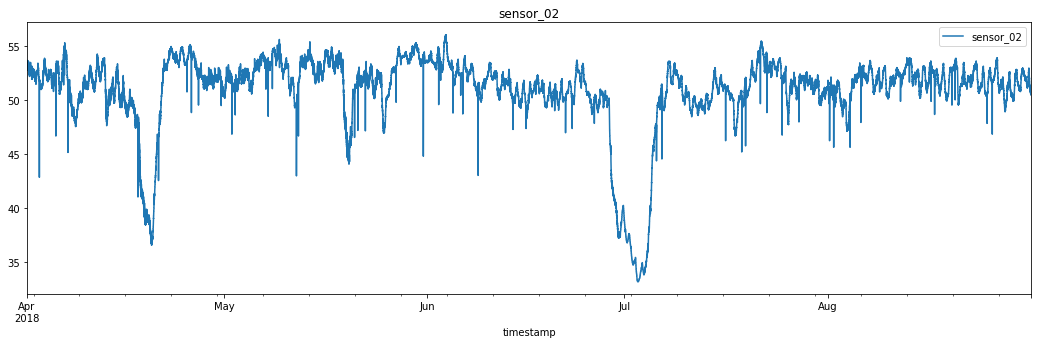

mean = 50.87, standard deviation = 3.67
Cutoff value = 56.37 , Lower cutoff value = 45.09


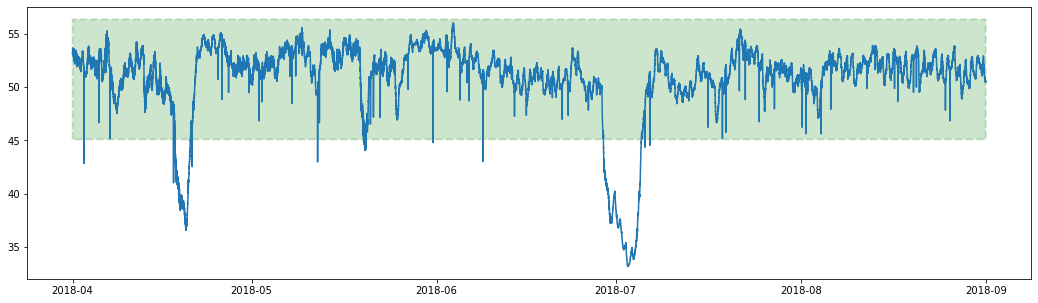

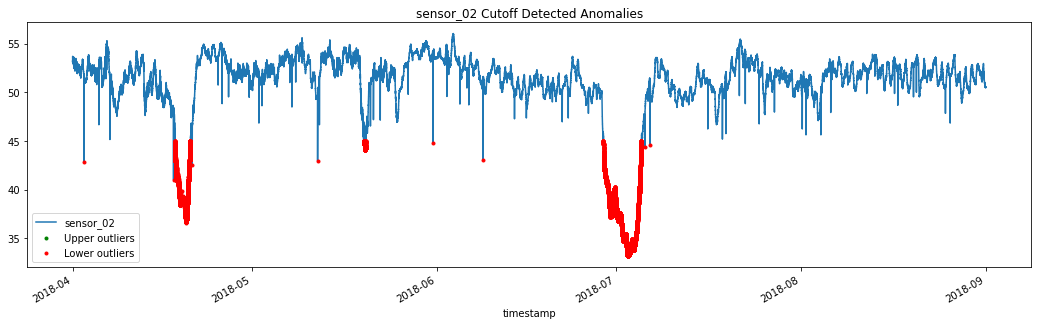

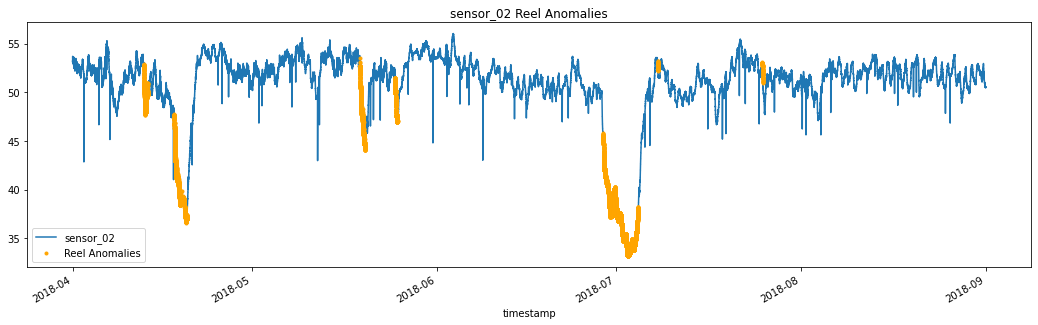

Anomalies: 14484
Anomalies by Cutoff : 13391
% Anomalies detected: 80.35%
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    205836
           1       0.87      0.80      0.84     14484

    accuracy                           0.98    220320
   macro avg       0.93      0.90      0.91    220320
weighted avg       0.98      0.98      0.98    220320

F1-score: 83.50%
Confusion matrix:
[[204083   1753]
 [  2846  11638]]
False Positive Rate: 13.09
False Negative Rate: 1.38


In [90]:
cutoff_upper_threshold  = 1.5
cutoff_lower_thrershold = 1.25
cutoff_sensor_data_02 =apply_cutoff_method('sensor_02',sensor_02_data,cutoff_upper_threshold,cutoff_lower_thrershold)

### Sensor 04

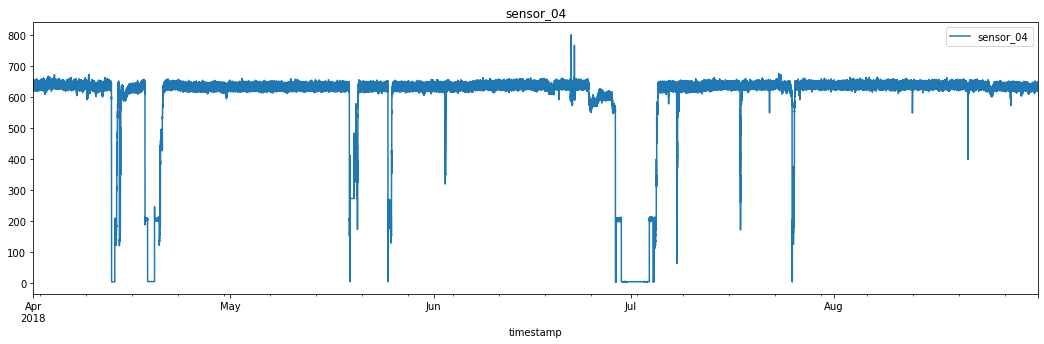

mean = 590.66, standard deviation = 144.04
Cutoff value = 734.71 , Lower cutoff value = 367.35


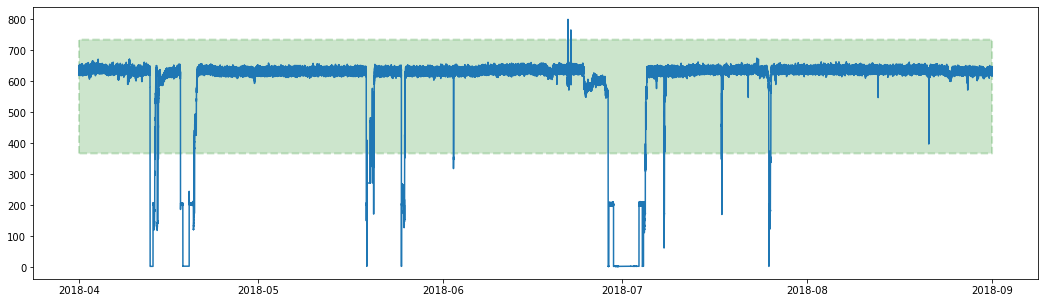

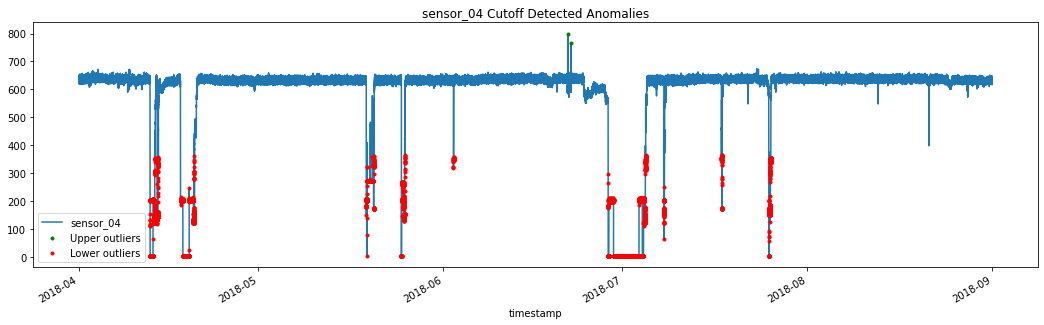

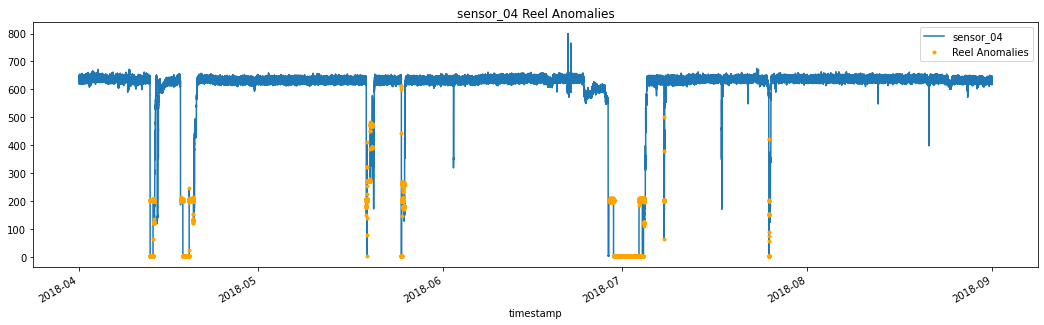

Anomalies: 14484
Anomalies by Cutoff : 16414
% Anomalies detected: 97.86%
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    205836
           1       0.86      0.98      0.92     14484

    accuracy                           0.99    220320
   macro avg       0.93      0.98      0.96    220320
weighted avg       0.99      0.99      0.99    220320

F1-score: 91.75%
Confusion matrix:
[[203596   2240]
 [   310  14174]]
False Positive Rate: 13.65
False Negative Rate: 0.15


In [91]:
cutoff_upper_threshold  = 1
cutoff_lower_thrershold = 2
cutoff_sensor_data_04 =apply_cutoff_method('sensor_04',sensor_04_data,cutoff_upper_threshold,cutoff_lower_thrershold)

### Sensor 10

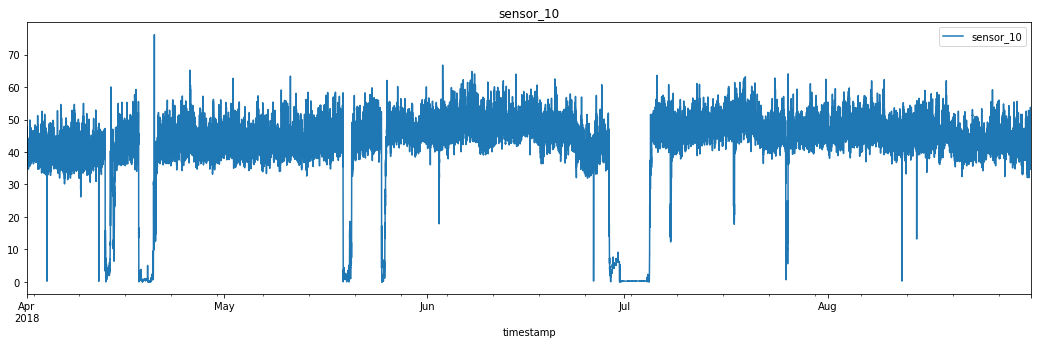

mean = 41.47, standard deviation = 12.09
Cutoff value = 65.66 , Lower cutoff value = 26.26


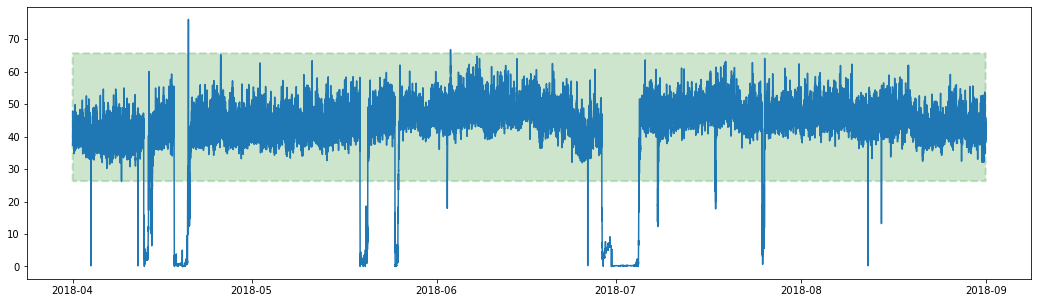

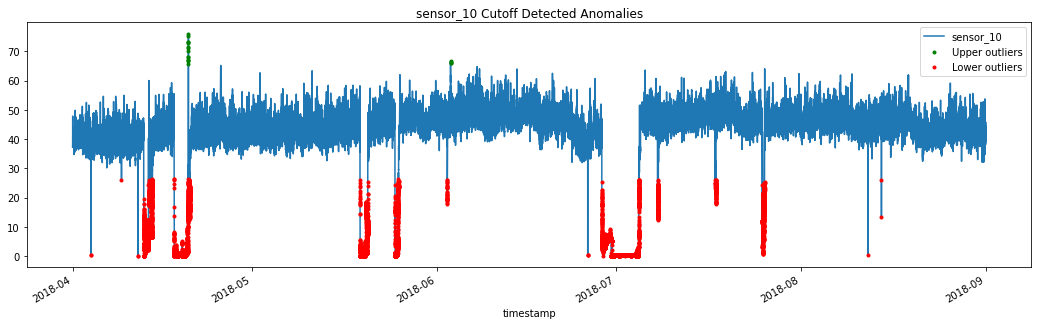

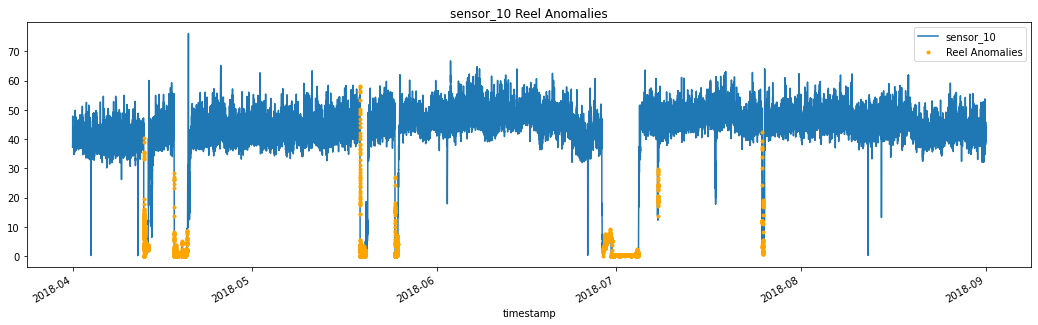

Anomalies: 14484
Anomalies by Cutoff : 17685
% Anomalies detected: 99.63%
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    205836
           1       0.82      1.00      0.90     14484

    accuracy                           0.98    220320
   macro avg       0.91      0.99      0.94    220320
weighted avg       0.99      0.98      0.99    220320

F1-score: 89.71%
Confusion matrix:
[[202581   3255]
 [    54  14430]]
False Positive Rate: 18.41
False Negative Rate: 0.03


In [92]:
cutoff_upper_threshold  = 2
cutoff_lower_thrershold = 2.5
cutoff_sensor_data_10 =apply_cutoff_method('sensor_10',sensor_10_data,cutoff_upper_threshold,cutoff_lower_thrershold)

### Sensor 42

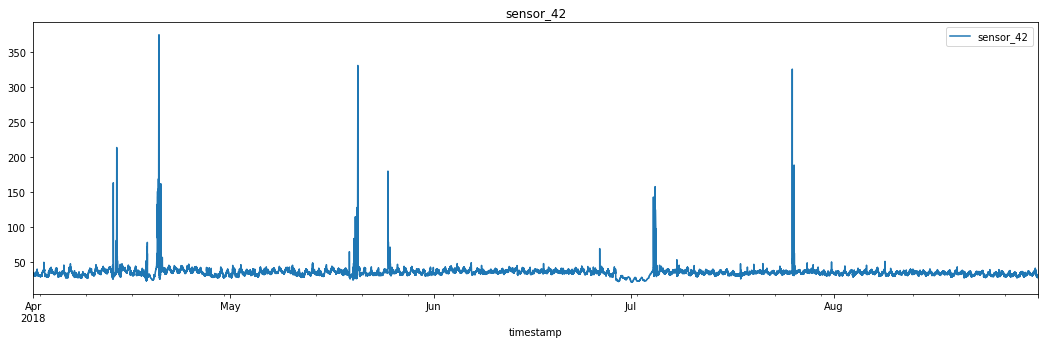

mean = 35.45, standard deviation = 10.26
Cutoff value = 73.92 , Lower cutoff value = 29.57


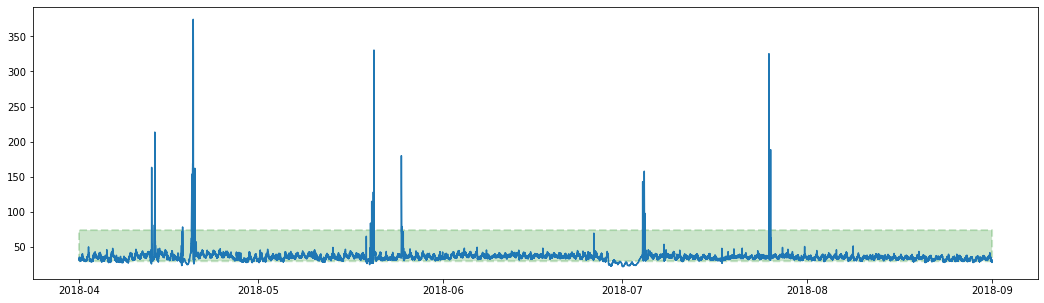

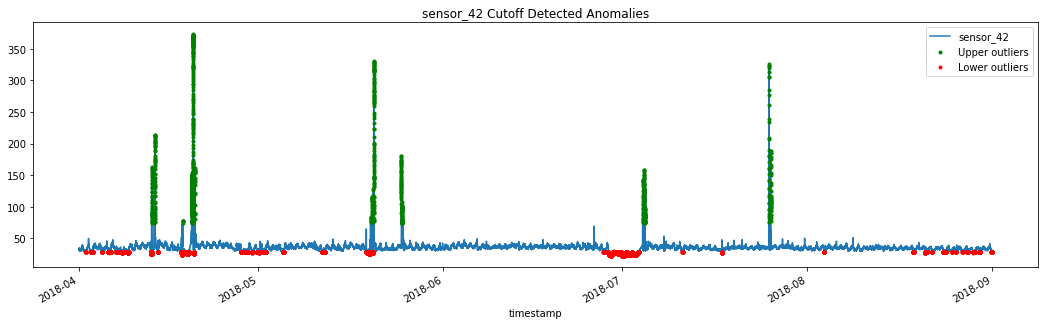

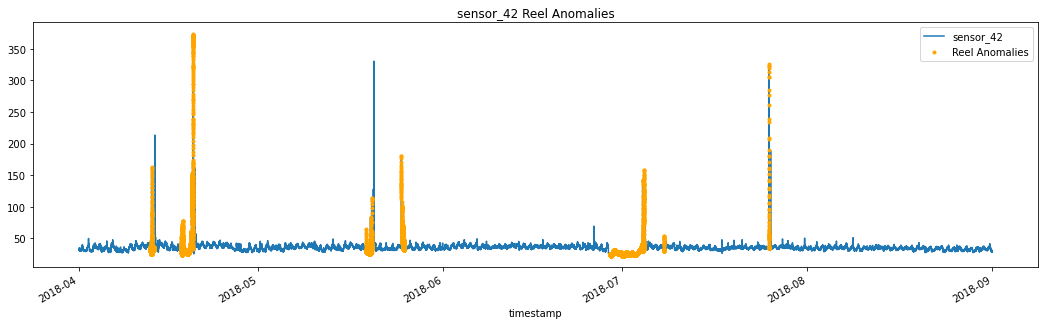

Anomalies: 14484
Anomalies by Cutoff : 13560
% Anomalies detected: 62.99%
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    205836
           1       0.67      0.63      0.65     14484

    accuracy                           0.96    220320
   macro avg       0.82      0.80      0.81    220320
weighted avg       0.95      0.96      0.95    220320

F1-score: 65.06%
Confusion matrix:
[[201399   4437]
 [  5361   9123]]
False Positive Rate: 32.72
False Negative Rate: 2.59


In [93]:
cutoff_upper_threshold  = 3.75
cutoff_lower_thrershold = 2.5
cutoff_sensor_data_42 =apply_cutoff_method('sensor_42',sensor_42_data,cutoff_upper_threshold,cutoff_lower_thrershold)

### Sensor 49

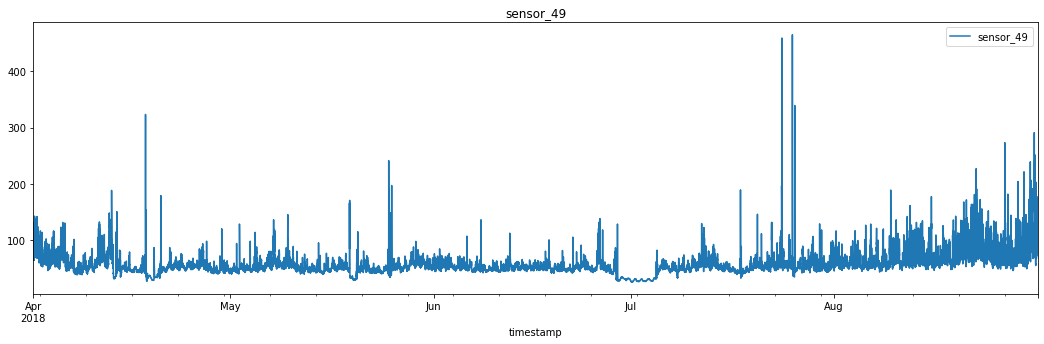

mean = 57.12, standard deviation = 19.14
Cutoff value = 97.32 , Lower cutoff value = 43.25


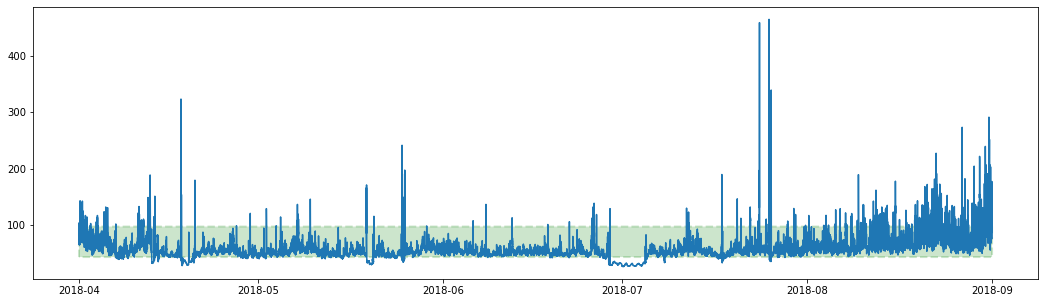

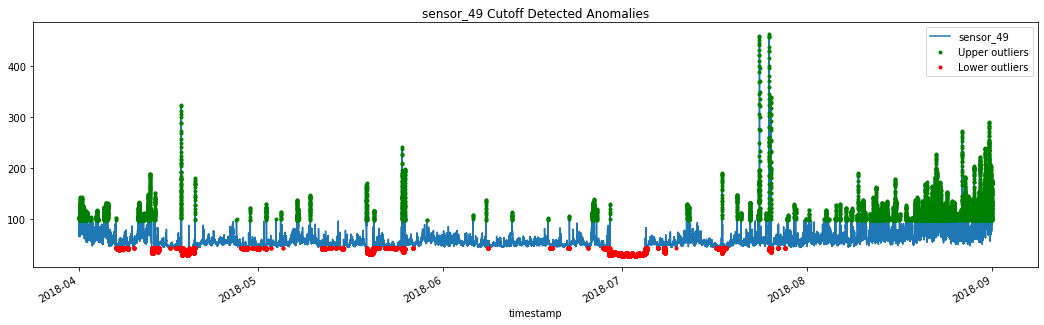

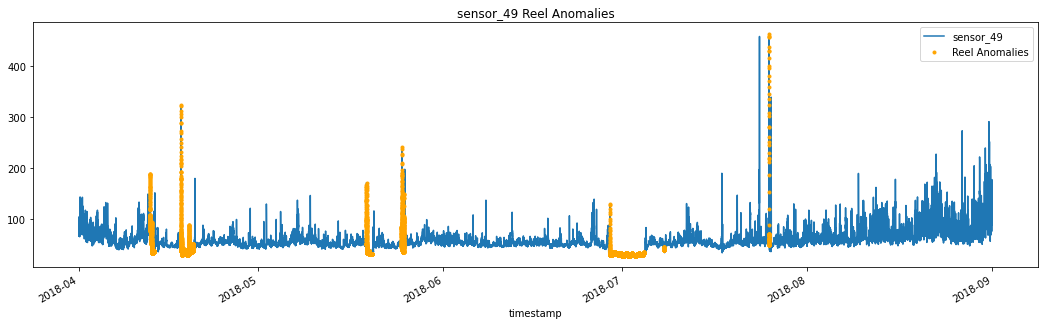

Anomalies: 14484
Anomalies by Cutoff : 30037
% Anomalies detected: 92.95%
[0 0 0 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.99      0.92      0.96    205836
           1       0.45      0.93      0.60     14484

    accuracy                           0.92    220320
   macro avg       0.72      0.92      0.78    220320
weighted avg       0.96      0.92      0.93    220320

F1-score: 60.48%
Confusion matrix:
[[189262  16574]
 [  1021  13463]]
False Positive Rate: 55.18
False Negative Rate: 0.54


In [94]:
cutoff_upper_threshold  = 2.1
cutoff_lower_thrershold = 2.25
cutoff_sensor_data_49 =apply_cutoff_method('sensor_49',sensor_49_data,cutoff_upper_threshold,cutoff_lower_thrershold)

In [95]:
results_df_round = results_df.round(2)
results_df_round.drop_duplicates(subset=['Sensor','Method'], keep='last', inplace=True)
results_df_round[results_df_round['Method'] == 'Cutoff'].sort_values(by=['Sensor','Method'])

Sensor  Method  Accuracy     F1  Recall  Precision   FNR    FPR
0  sensor_00  Cutoff     97.80  85.63   99.92      74.92  0.01  25.08
1  sensor_01  Cutoff     96.64  75.90   80.52      71.79  1.38  28.21
2  sensor_02  Cutoff     97.91  83.50   80.35      86.91  1.38  13.09
3  sensor_04  Cutoff     98.84  91.75   97.86      86.35  0.15  13.65
4  sensor_10  Cutoff     98.50  89.71   99.63      81.59  0.03  18.41
5  sensor_42  Cutoff     95.55  65.06   62.99      67.28  2.59  32.72
6  sensor_49  Cutoff     92.01  60.48   92.95      44.82  0.54  55.18

### Cutoff method Result Analysis 
### ------------------------------

### The first thing we can notice while using this method, is that most anomalies do not follow a speficif distribution <br> thus taking a cutoff window depending on the global Mean and Standard Deviation will not be a good idea.
### Another problem is that the cutoff window is not the same for all the sensors and we have to fine tune most of the time to the smallest
### fractions to be able to detect the majority of anomalies.
### Giving that we only have 2 labels used most of the time [ NORMAL, BROKEN ], and after taking a look at the confusion matrix
### Even with high accuracy of detection we can see that the model is not able to detect the broken status most of the time we have:
- ### a high of False positives Rate on the depende of Low Negative Rate. Or
- ### a high of False negatives Rate on the depende of Low Positive Rate.
### We can detect that the model is broken while is perfeftly normal <------
### F1 score for this method ranges between ~ [0.45, 0.65]  so the classification BAD to OK ... is not very accurate for classifing anomalies.

# --------------------------------------------------

### 02 -  Compute the Global Z- Score


In [96]:
def apply_z_score_method(sensor,data,confidence_interval=1.97):
    #plot original data
    plot_sensor(sensor,data)
    
    # Get mean and standard deviation
    mean = data[sensor].mean()
    std =  data[sensor].std()
    print(f"mean = {mean:.2f}, standard deviation = {std:.2f}")
    
    # Get Z_score
    z_score = np.abs((data[sensor] - mean) / std) 
    
    # detect outliers
    new_data=data.copy()
    new_data['z_score'] = np.abs((data[sensor] - mean) / std)
    new_data['z_score_status'] = 0
    mask = new_data.z_score>=confidence_interval # 95% confidence interval
    new_data.loc[mask, 'z_score_status'] = 1

    #detect and plot outliers
    outliers_z = new_data[mask][sensor]

    plot_outliers(sensor,new_data,outliers_z,outliers_z)
    
    plot_sensor_reel_anomalies(sensor,data)
    
    anomalies= data[data['machine_status']== 1][sensor]
    intersection = (anomalies.index).intersection(outliers_z.index)
    anomalies_count =anomalies.size
    anomalies_detected =outliers_z.size
    anomalies_detected_percentage =intersection.size*100/anomalies_count
    print('Anomalies:', anomalies_count)
    print('Anomalies by Z-score :', anomalies_detected)
    print('% Anomalies detected: {:.2f}%'. format(anomalies_detected_percentage))
    
    assesements = asses_method(new_data['machine_status'],new_data['z_score_status'])
    Accuracy=assesements['Accuracy']
    F1=assesements['F1']
    Recall=assesements['Recall']
    Precision=assesements['Precision']
    FNR=assesements['FNR']
    FPR=assesements['FPR']

    #Sensor','Method','Accuracy','F1','Recall','Precision','FNR','FPR'
    results_df.loc[len(results_df)] = [sensor,'Z-Score',Accuracy,F1,Recall,Precision,FNR,FPR]
    return new_data

results_df=results_df[(results_df.Method != 'Z-Score')]

- The critical z-score values when using a 95 percent confidence level are -1.96 and +1.96 standard deviations.

### Sensor 00

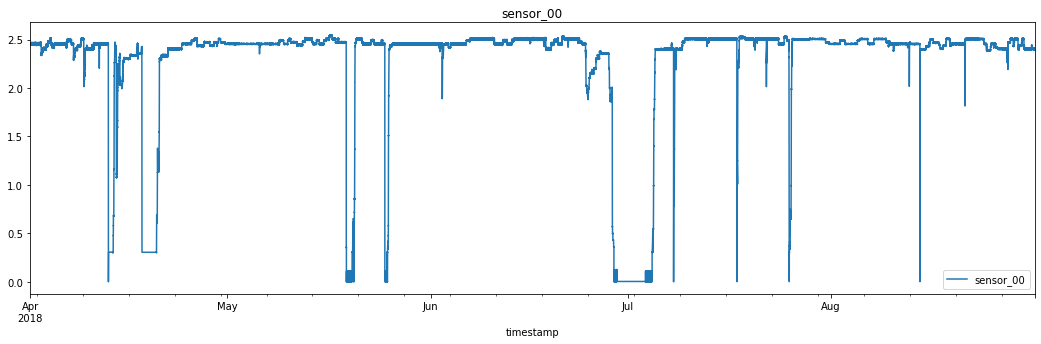

mean = 2.27, standard deviation = 0.62


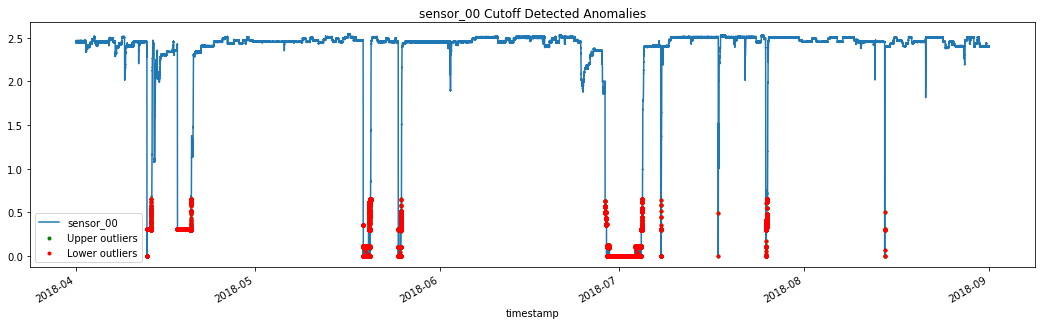

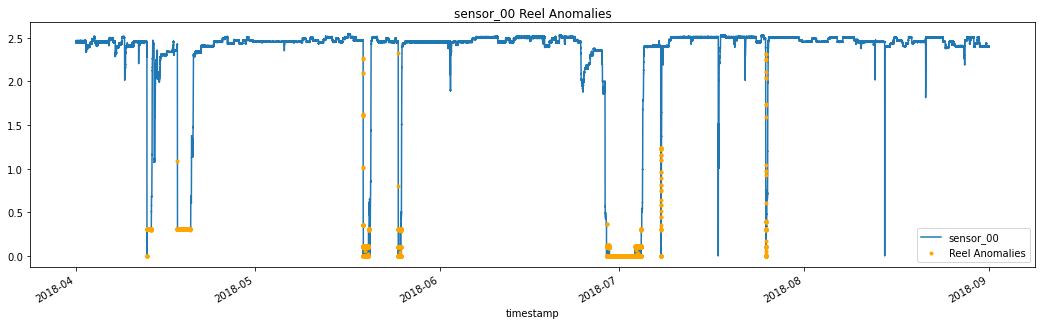

Anomalies: 14484
Anomalies by Z-score : 16365
% Anomalies detected: 99.66%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    205836
           1       0.88      1.00      0.94     14484

    accuracy                           0.99    220320
   macro avg       0.94      0.99      0.97    220320
weighted avg       0.99      0.99      0.99    220320

F1-score: 93.58%
Confusion matrix:
[[203906   1930]
 [    49  14435]]
False Positive Rate: 11.79
False Negative Rate: 0.02


In [97]:
z_score_sensor_data_00=apply_z_score_method('sensor_00',sensor_00_data,confidence_interval=2.58)

### Sensor 01

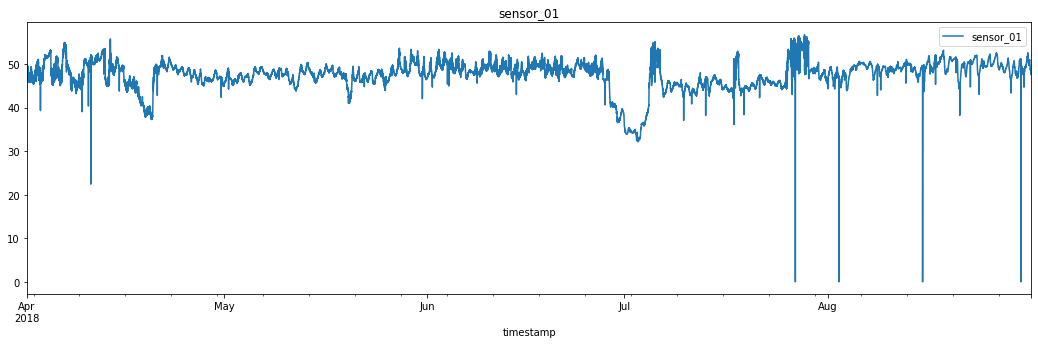

mean = 47.60, standard deviation = 3.30


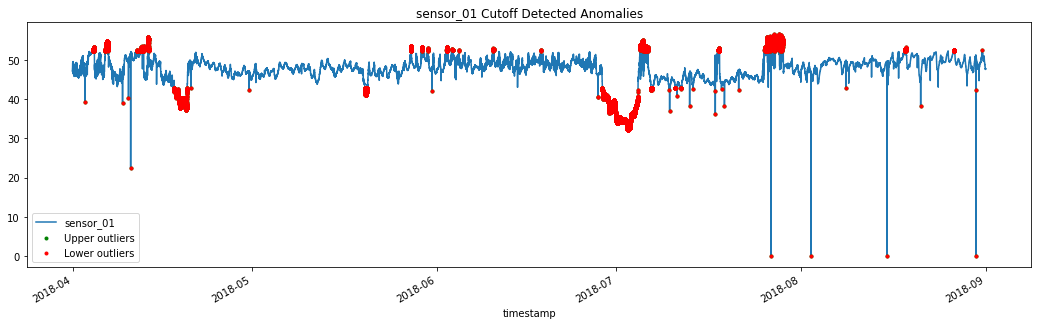

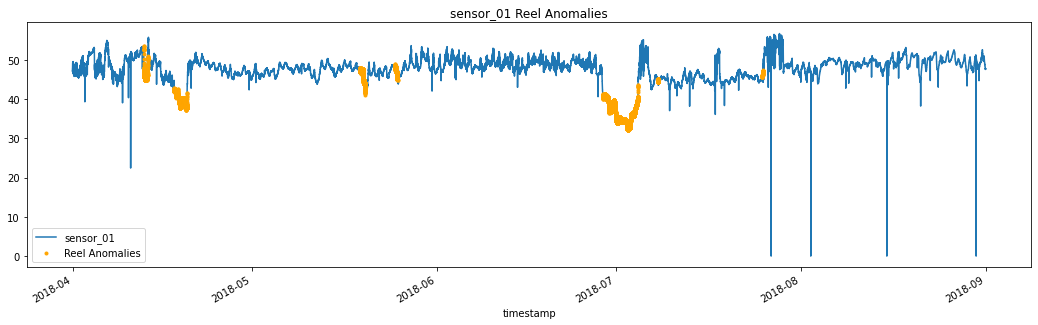

Anomalies: 14484
Anomalies by Z-score : 19097
% Anomalies detected: 80.35%
              precision    recall  f1-score   support

           0       0.99      0.96      0.97    205836
           1       0.61      0.80      0.69     14484

    accuracy                           0.95    220320
   macro avg       0.80      0.88      0.83    220320
weighted avg       0.96      0.95      0.96    220320

F1-score: 69.31%
Confusion matrix:
[[198377   7459]
 [  2846  11638]]
False Positive Rate: 39.06
False Negative Rate: 1.41


In [98]:
z_score_sensor_data_01=apply_z_score_method('sensor_01',sensor_01_data,confidence_interval=1.45)

### Sensor 02

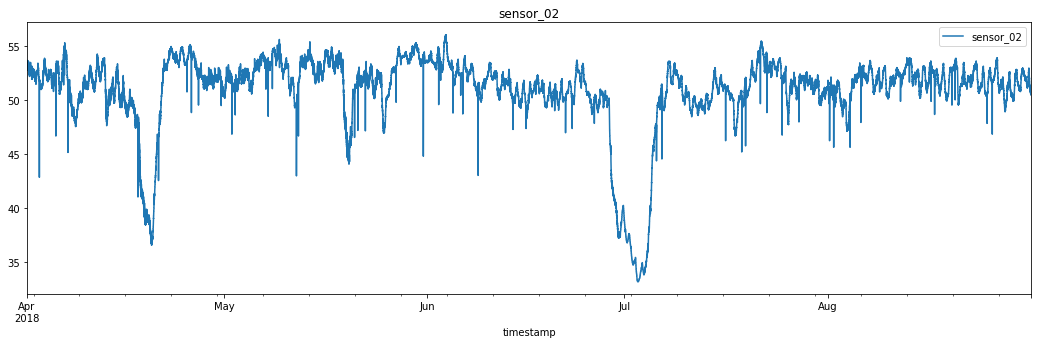

mean = 50.87, standard deviation = 3.67


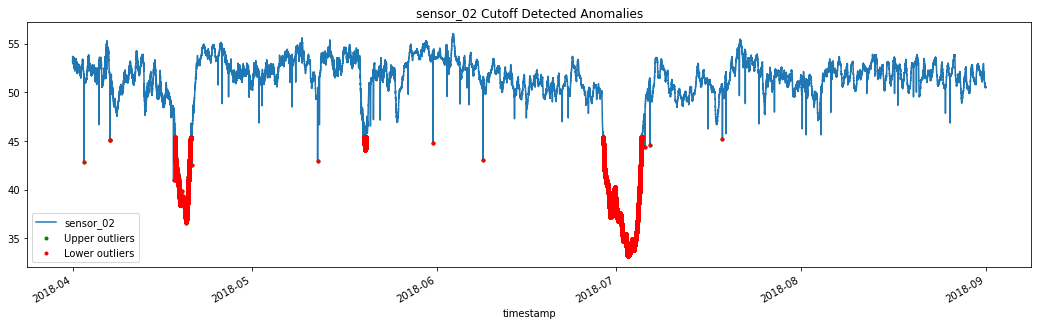

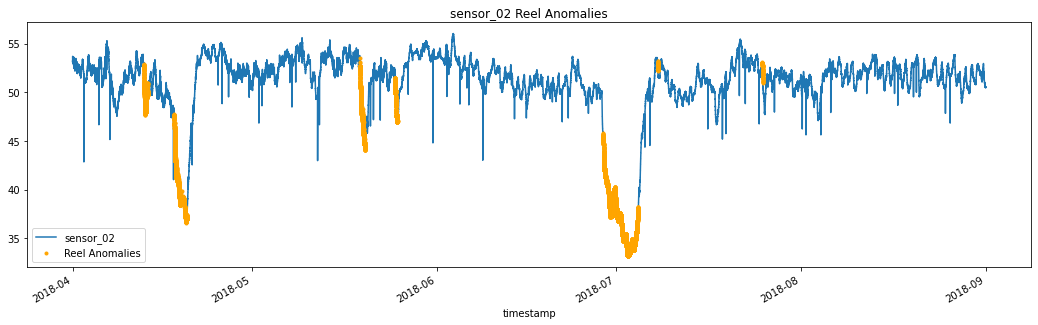

Anomalies: 14484
Anomalies by Z-score : 13733
% Anomalies detected: 81.25%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    205836
           1       0.86      0.81      0.83     14484

    accuracy                           0.98    220320
   macro avg       0.92      0.90      0.91    220320
weighted avg       0.98      0.98      0.98    220320

F1-score: 83.41%
Confusion matrix:
[[203871   1965]
 [  2716  11768]]
False Positive Rate: 14.31
False Negative Rate: 1.31


In [99]:
z_score_sensor_data_02=apply_z_score_method('sensor_02',sensor_02_data,confidence_interval=1.48)

### Sensor 04

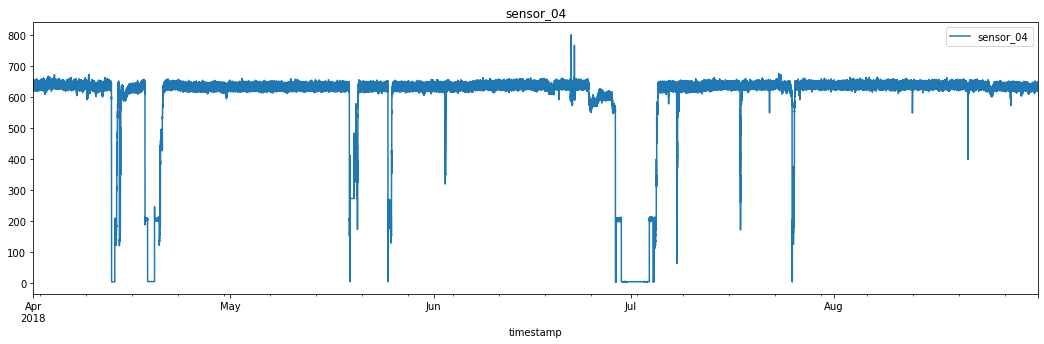

mean = 590.66, standard deviation = 144.04


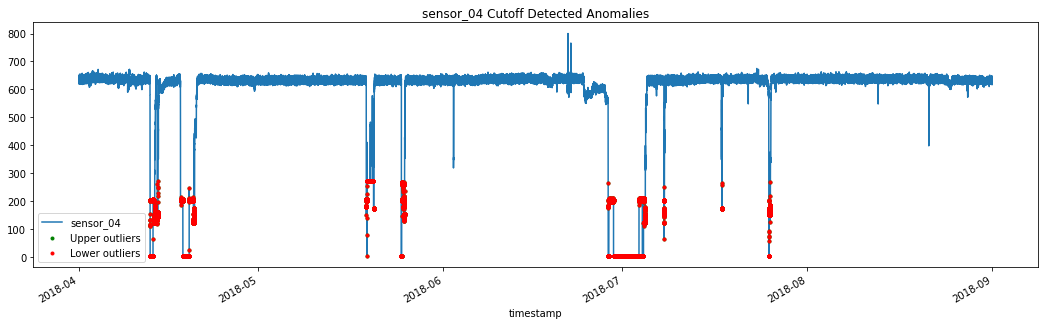

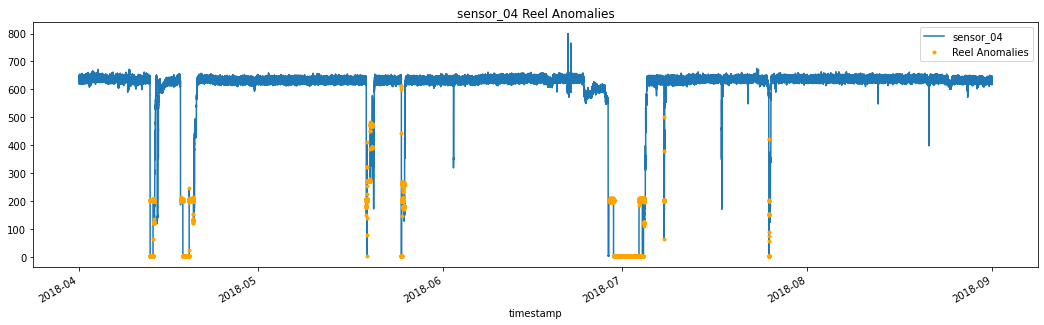

Anomalies: 14484
Anomalies by Z-score : 15959
% Anomalies detected: 97.84%
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    205836
           1       0.89      0.98      0.93     14484

    accuracy                           0.99    220320
   macro avg       0.94      0.98      0.96    220320
weighted avg       0.99      0.99      0.99    220320

F1-score: 93.10%
Confusion matrix:
[[204048   1788]
 [   313  14171]]
False Positive Rate: 11.2
False Negative Rate: 0.15


In [100]:
z_score_sensor_data_00=apply_z_score_method('sensor_04',sensor_04_data,confidence_interval=2.2)

### Sensor 10

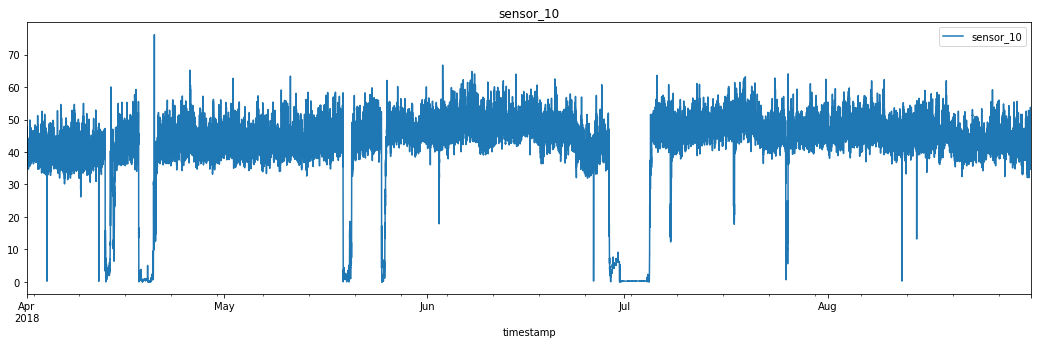

mean = 41.47, standard deviation = 12.09


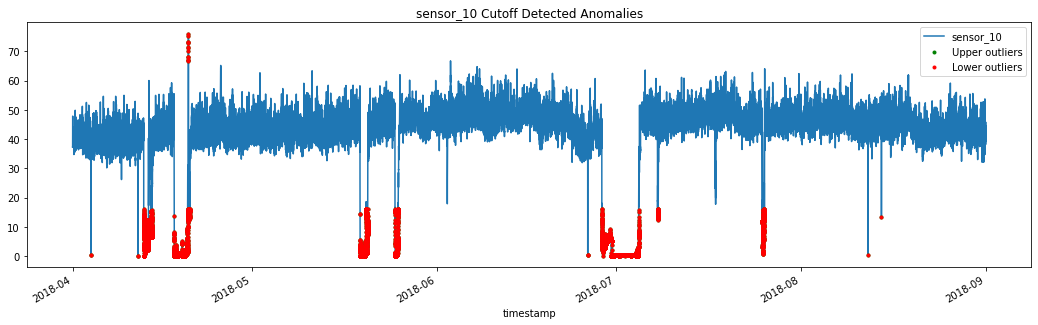

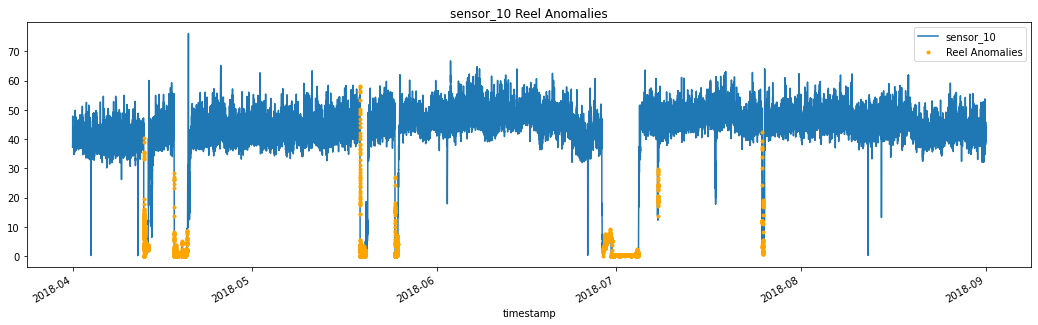

Anomalies: 14484
Anomalies by Z-score : 16382
% Anomalies detected: 99.12%
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    205836
           1       0.88      0.99      0.93     14484

    accuracy                           0.99    220320
   macro avg       0.94      0.99      0.96    220320
weighted avg       0.99      0.99      0.99    220320

F1-score: 93.02%
Confusion matrix:
[[203810   2026]
 [   128  14356]]
False Positive Rate: 12.37
False Negative Rate: 0.06


In [101]:
z_score_sensor_data_10=apply_z_score_method('sensor_10',sensor_10_data,confidence_interval=2.1)

### Sensor 42

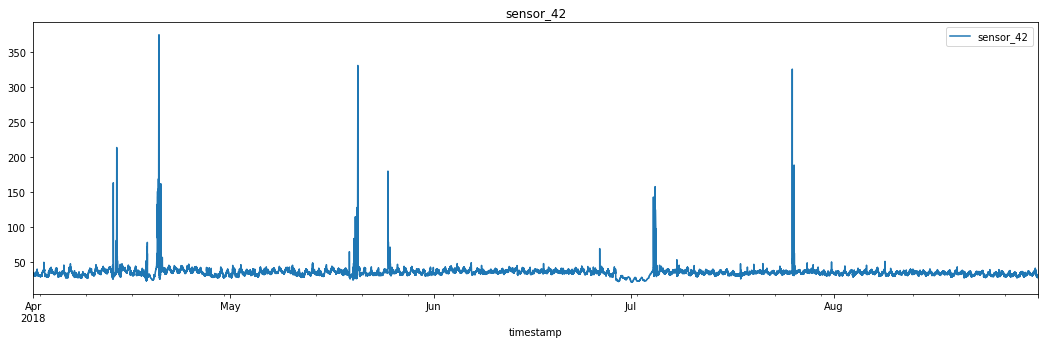

mean = 35.45, standard deviation = 10.26


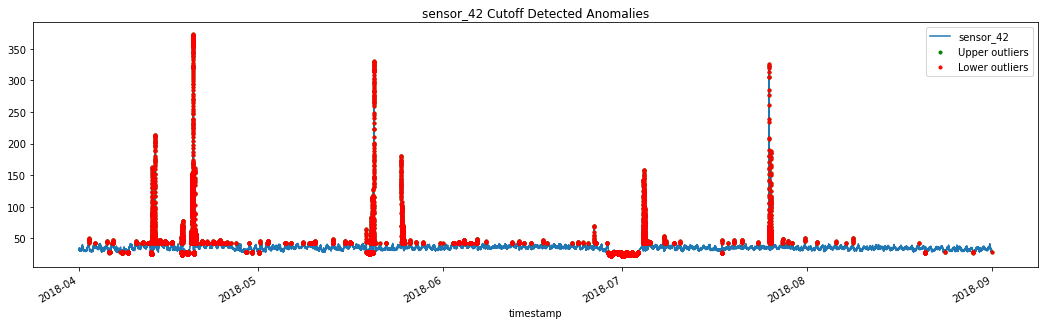

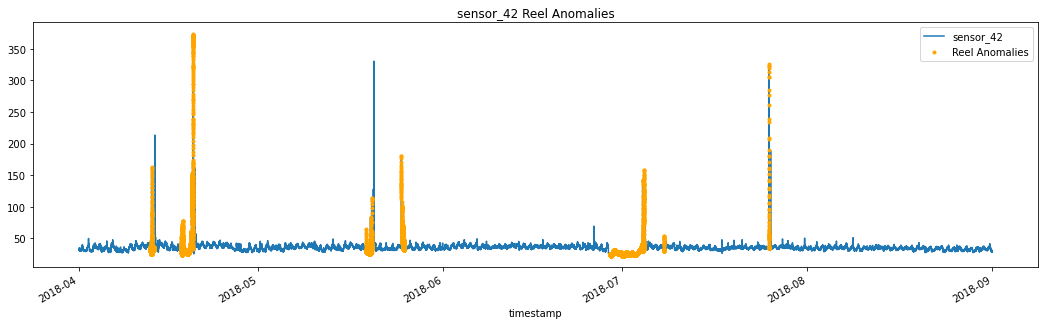

Anomalies: 14484
Anomalies by Z-score : 12332
% Anomalies detected: 59.87%
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    205836
           1       0.70      0.60      0.65     14484

    accuracy                           0.96    220320
   macro avg       0.84      0.79      0.81    220320
weighted avg       0.95      0.96      0.96    220320

F1-score: 64.67%
Confusion matrix:
[[202175   3661]
 [  5813   8671]]
False Positive Rate: 29.69
False Negative Rate: 2.79


In [102]:
z_score_sensor_data_42=apply_z_score_method('sensor_42',sensor_42_data,confidence_interval=0.7)

### Sensor 49

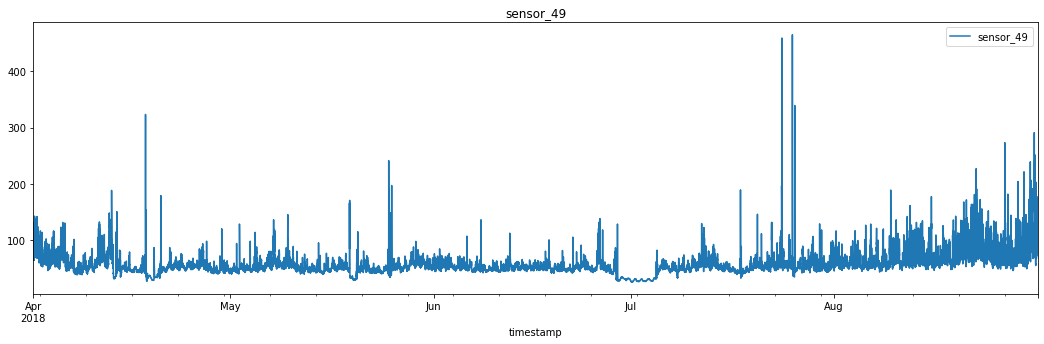

mean = 57.12, standard deviation = 19.14


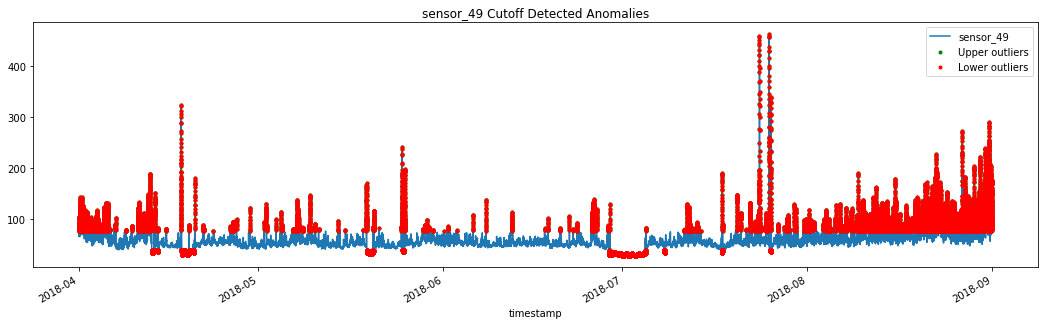

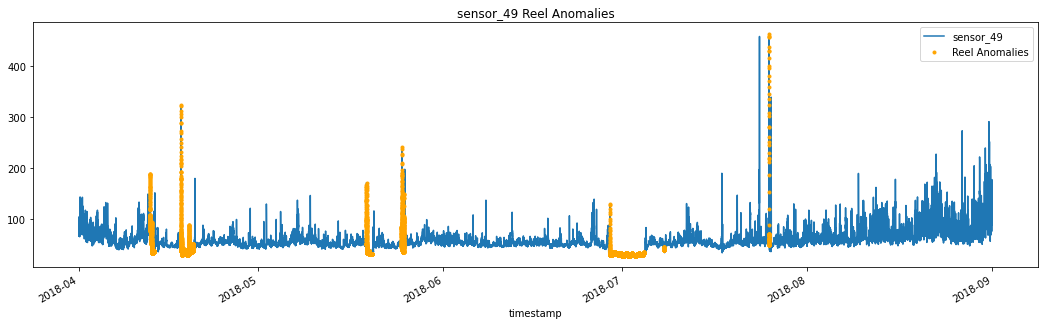

Anomalies: 14484
Anomalies by Z-score : 37607
% Anomalies detected: 91.05%
              precision    recall  f1-score   support

           0       0.99      0.88      0.93    205836
           1       0.35      0.91      0.51     14484

    accuracy                           0.88    220320
   macro avg       0.67      0.90      0.72    220320
weighted avg       0.95      0.88      0.91    220320

F1-score: 50.63%
Confusion matrix:
[[181416  24420]
 [  1297  13187]]
False Positive Rate: 64.93
False Negative Rate: 0.71


In [103]:
z_score_sensor_data_49=apply_z_score_method('sensor_49',sensor_49_data,confidence_interval=1)

In [104]:
results_df_round = results_df.round(2)
results_df_round.drop_duplicates(subset=['Sensor','Method'], keep='last', inplace=True)
results_df_round[results_df_round['Method'] == 'Z-Score'].sort_values(by=['Sensor','Method'])

Sensor   Method  Accuracy     F1  Recall  Precision   FNR    FPR
7   sensor_00  Z-Score     99.10  93.58   99.66      88.21  0.02  11.79
8   sensor_01  Z-Score     95.32  69.31   80.35      60.94  1.41  39.06
9   sensor_02  Z-Score     97.88  83.41   81.25      85.69  1.31  14.31
10  sensor_04  Z-Score     99.05  93.10   97.84      88.80  0.15  11.20
11  sensor_10  Z-Score     99.02  93.02   99.12      87.63  0.06  12.37
12  sensor_42  Z-Score     95.70  64.67   59.87      70.31  2.79  29.69
13  sensor_49  Z-Score     88.33  50.63   91.05      35.07  0.71  64.93

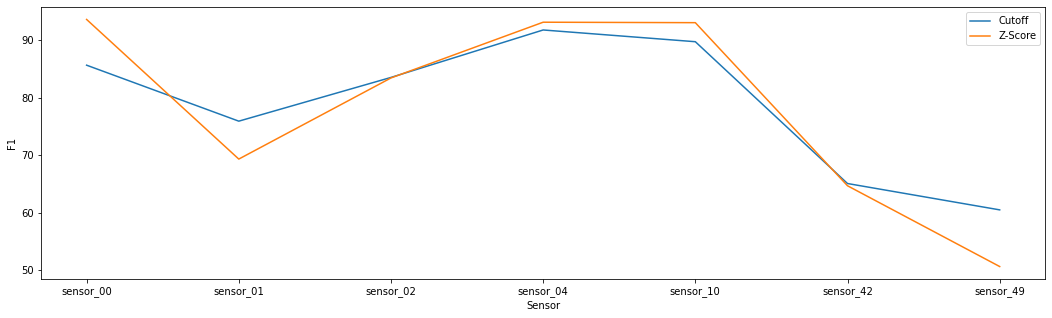

In [105]:
import seaborn as sns

sns.lineplot(x='Sensor',y='F1',hue='Method',data=results_df_round)
plt.legend(loc='upper right')

### Z-Score method Result Analysis 
### ------------------------------

### The first thing we can notice while using this method,it can give better results when it comes to sensors with high variance data
### we will not be able to detect accuratly the anomalies for sensors with very low variance and high bias 
### Another problem is that
### This method is using confident interval to determine outliers, the confident interval is not the same for all the sensors and we have to fine tune most of the time
### The Global confident interval can be missleading for some sensors.
### - False Positive Rate is slighlty lower for this method
### - Giving that we only have 2 labels used most of the time [ NORMAL, BROKEN ], and after taking a look at the confusion matrix
### - Same as cutoff method even with high accuracy of detection we can see that the model is not able to detect the broken status most of the time we have:
- ### a high of False positives Rate on the depende of Low Negative Rate. Or
- ### a high of False negatives Rate on the depende of Low Positive Rate.
### We can detect that the model is broken while is perfeftly normal <------
### F1 score for this method ranges between [0.45, 0.65]  so the classification BAD to OK ... is not very accurate for classifing very similar to Cutoff method .

# --------------------------------------------------

###  3.0 Detection and Treatment in Python Using Inter Quartile Range rule
- One practical use of the IQR is to detect outliers in your data.
- The general rule is that outliers are observations that fall: 
    - below 25th percentile – 1.5 * IQR, 
    - or. above 75th percentile + 1.5 * IQR

In [106]:
def ApplyInterQuartileRange(sensor,data,upper_cutoff_threshold = 1.5, lower_cutoff_threshold =1.5):
    
    #plot original data
    plot_sensor(sensor,data)
    
    sorted(data[sensor])
    Q1,Q3 = np.percentile(data[sensor] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (upper_cutoff_threshold * IQR)
    upper_range = Q3 + (lower_cutoff_threshold * IQR)
    print(f'Lower range = {lower_range:.2f} , Upper range = {upper_range:.2f}')
    
    new_data=data.copy()
    new_data['IQR_status'] = 0
    mask = (new_data[sensor]> upper_range) | (new_data[sensor]< lower_range)
    new_data.loc[mask, 'IQR_status'] = 1
    
    # detect and plot upper outliers
    outliers_u = new_data[new_data[sensor]> upper_range][sensor]
    
    #detect and plot lower outliers
    outliers_l = new_data[new_data[sensor]<lower_range][sensor]

    plot_outliers(sensor,new_data,outliers_u,outliers_l)
    
    plot_sensor_reel_anomalies(sensor,new_data)
    
    anomalies= data[data['machine_status']== 1][sensor]
    intersection = (anomalies.index).intersection(outliers_u.index.union(outliers_l.index))
    anomalies_count =anomalies.size
    anomalies_detected =outliers_u.size+ outliers_l.size
    anomalies_detected_percentage =intersection.size*100/anomalies_count
    print('Anomalies:', anomalies_count)
    print('Anomalies by Cutoff :', anomalies_detected)
    print('% Anomalies detected: {:.2f}%'. format(anomalies_detected_percentage))
    
    assesements = asses_method(new_data['machine_status'],new_data['IQR_status'])
    Accuracy=assesements['Accuracy']
    F1=assesements['F1']
    Recall=assesements['Recall']
    Precision=assesements['Precision']
    FNR=assesements['FNR']
    FPR=assesements['FPR']

    #Sensor','Method','Accuracy','F1','Recall','Precision','FNR','FPR'
    results_df.loc[len(results_df)] = [sensor,'IQR',Accuracy,F1,Recall,Precision,FNR,FPR]
    return new_data



results_df=results_df[(results_df.Method != 'IQR')]


### Sensor 00

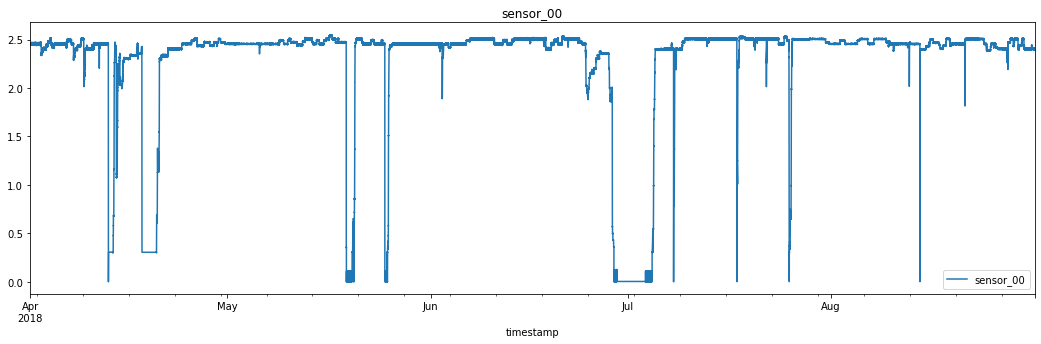

Lower range = 2.37 , Upper range = 2.69


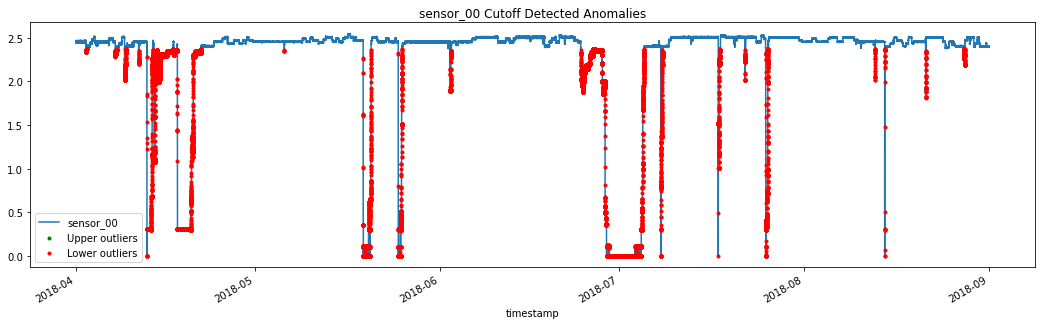

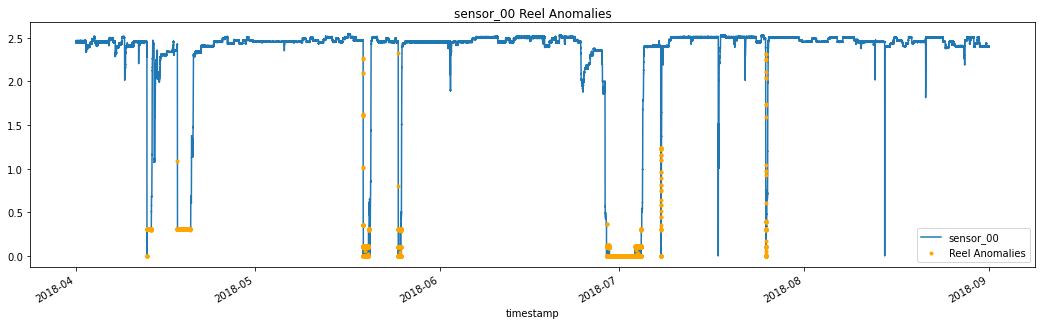

Anomalies: 14484
Anomalies by Cutoff : 33134
% Anomalies detected: 100.00%
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    205836
           1       0.44      1.00      0.61     14484

    accuracy                           0.92    220320
   macro avg       0.72      0.95      0.78    220320
weighted avg       0.96      0.92      0.93    220320

F1-score: 60.83%
Confusion matrix:
[[187186  18650]
 [     0  14484]]
False Positive Rate: 56.29
False Negative Rate: 0.0


In [107]:
iqr_sensor_data_00=ApplyInterQuartileRange('sensor_00',sensor_00_data,0.58,2.4)

### Sensor 01

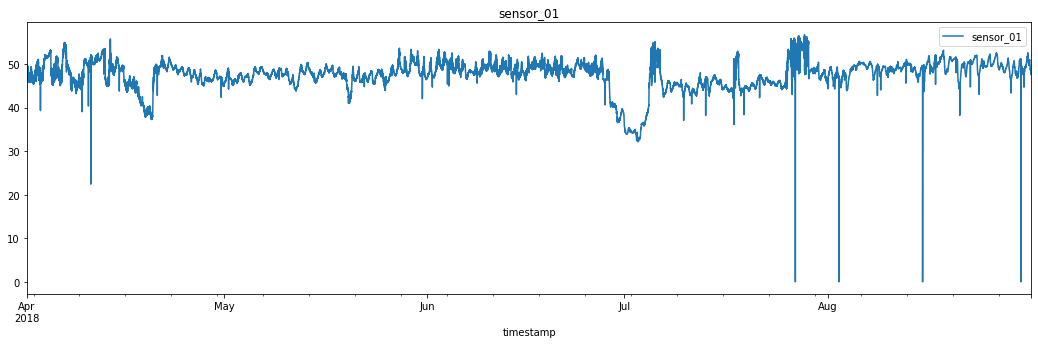

Lower range = 43.14 , Upper range = 57.40


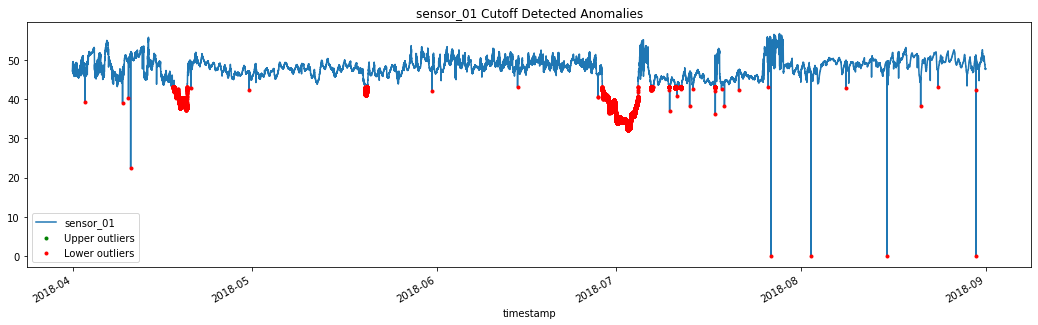

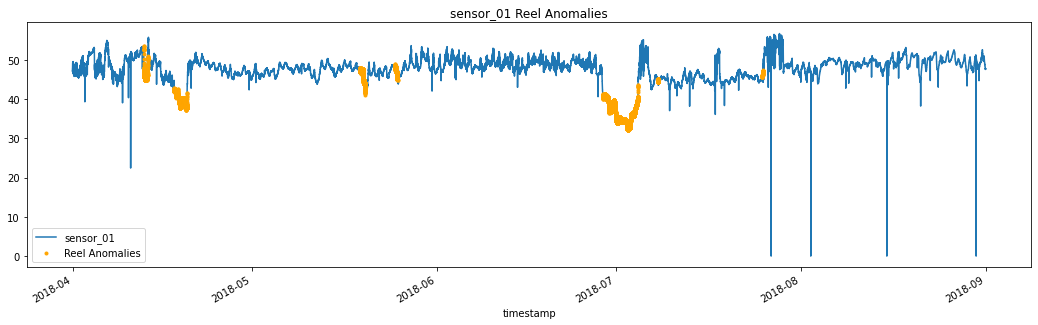

Anomalies: 14484
Anomalies by Cutoff : 13330
% Anomalies detected: 80.43%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    205836
           1       0.87      0.80      0.84     14484

    accuracy                           0.98    220320
   macro avg       0.93      0.90      0.91    220320
weighted avg       0.98      0.98      0.98    220320

F1-score: 83.77%
Confusion matrix:
[[204156   1680]
 [  2834  11650]]
False Positive Rate: 12.6
False Negative Rate: 1.37


In [108]:
iqr_sensor_data_01=ApplyInterQuartileRange('sensor_01',sensor_01_data,1,2.5)

### Sensor 02

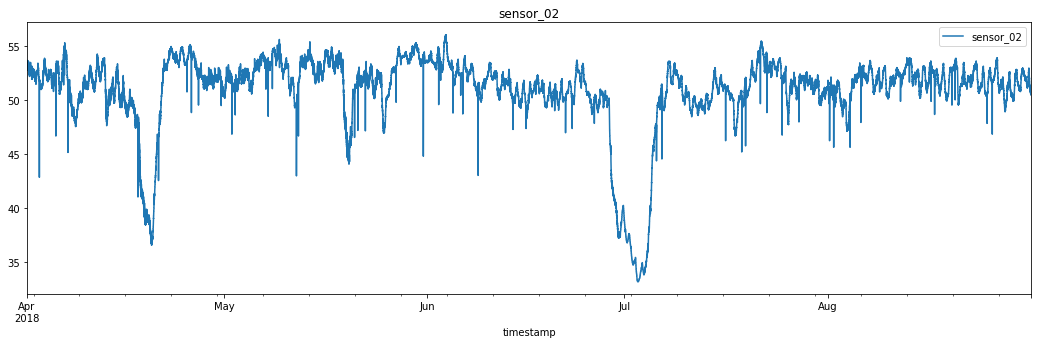

Lower range = 48.46 , Upper range = 56.60


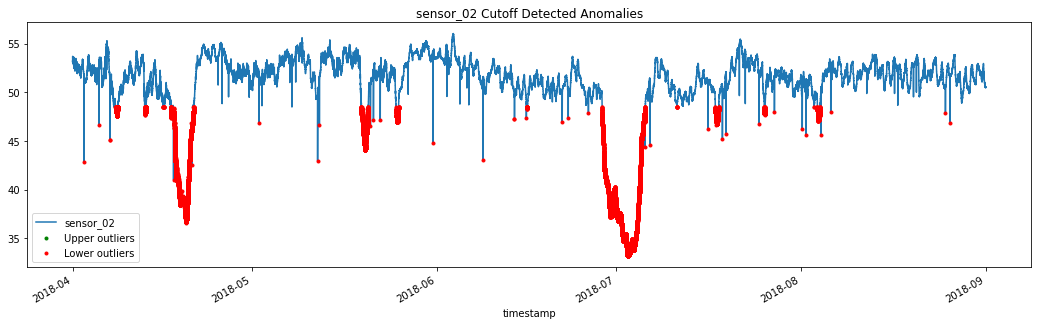

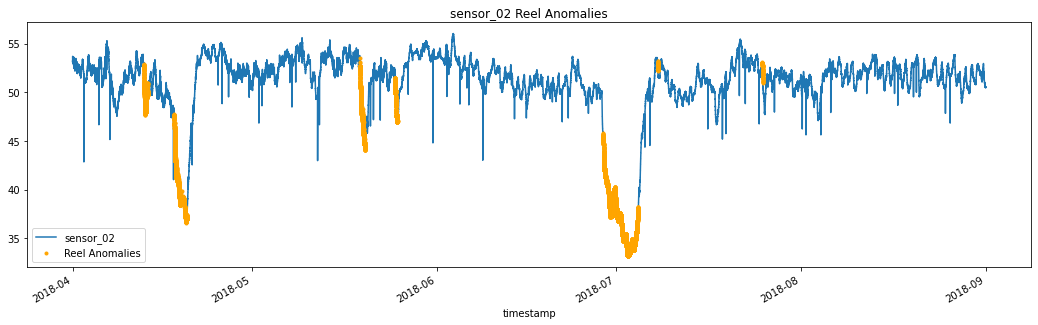

Anomalies: 14484
Anomalies by Cutoff : 20823
% Anomalies detected: 90.09%
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    205836
           1       0.63      0.90      0.74     14484

    accuracy                           0.96    220320
   macro avg       0.81      0.93      0.86    220320
weighted avg       0.97      0.96      0.96    220320

F1-score: 73.91%
Confusion matrix:
[[198061   7775]
 [  1436  13048]]
False Positive Rate: 37.34
False Negative Rate: 0.72


In [109]:
iqr_sensor_data_02=ApplyInterQuartileRange('sensor_02',sensor_02_data,0.81,1.6)

### Sensor 04

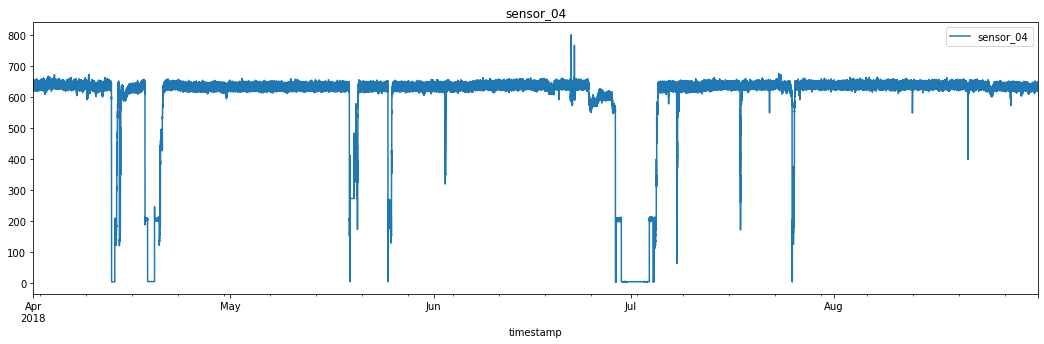

Lower range = 296.76 , Upper range = 692.59


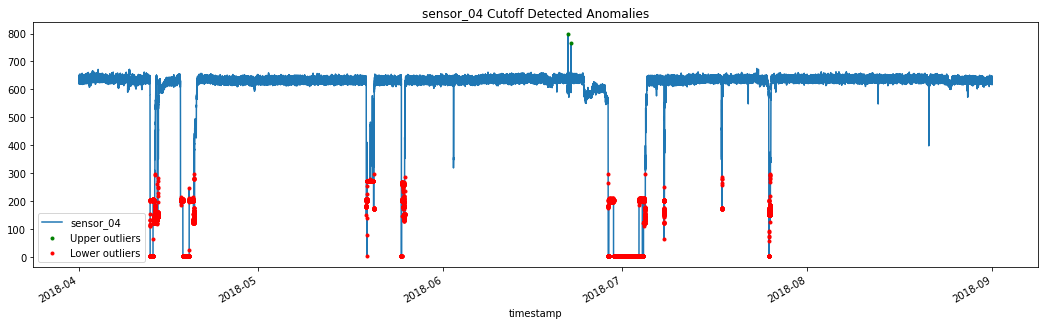

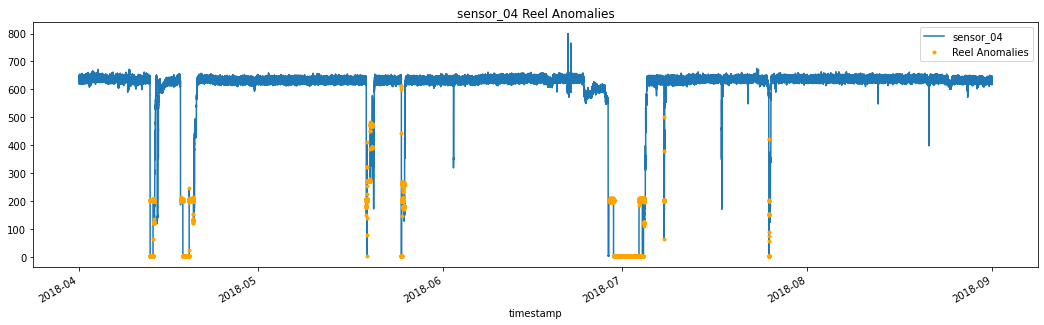

Anomalies: 14484
Anomalies by Cutoff : 15985
% Anomalies detected: 97.85%
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    205836
           1       0.89      0.98      0.93     14484

    accuracy                           0.99    220320
   macro avg       0.94      0.98      0.96    220320
weighted avg       0.99      0.99      0.99    220320

F1-score: 93.03%
Confusion matrix:
[[204023   1813]
 [   312  14172]]
False Positive Rate: 11.34
False Negative Rate: 0.15


In [110]:
iqr_sensor_data_04=ApplyInterQuartileRange('sensor_04',sensor_04_data,30,5)

### Sensor 10

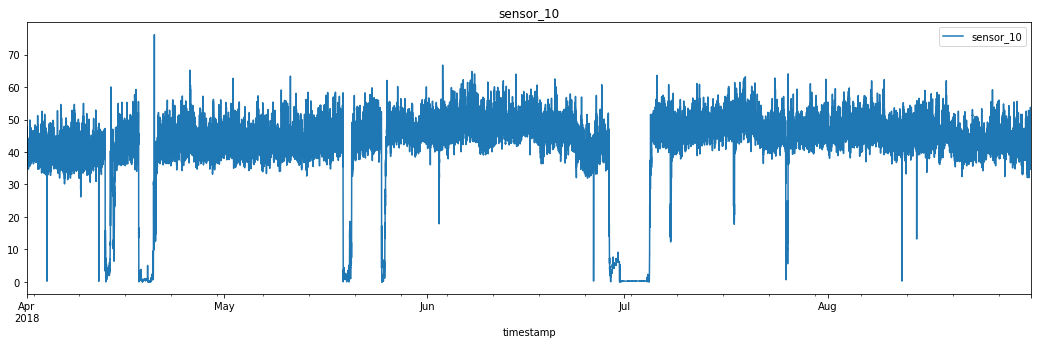

Lower range = 23.81 , Upper range = 69.09


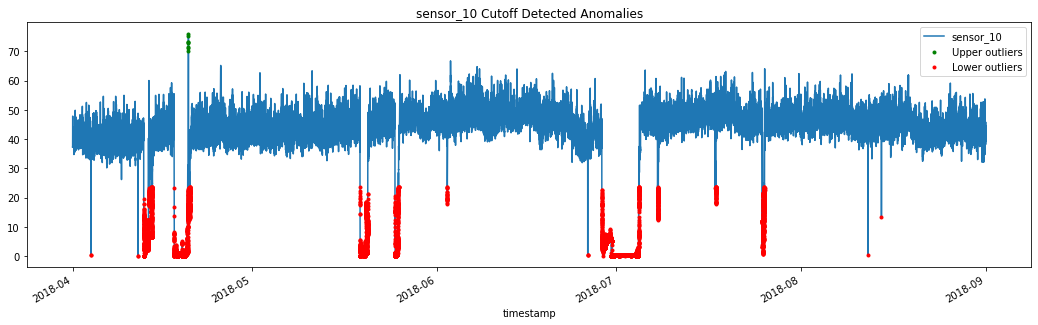

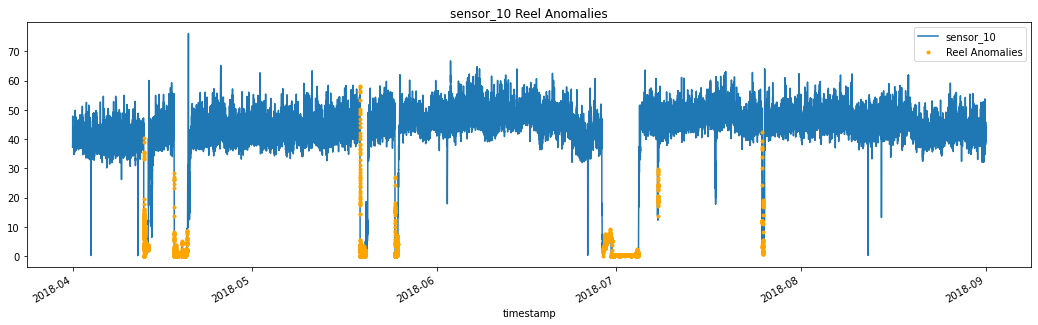

Anomalies: 14484
Anomalies by Cutoff : 17453
% Anomalies detected: 99.50%
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    205836
           1       0.83      0.99      0.90     14484

    accuracy                           0.99    220320
   macro avg       0.91      0.99      0.95    220320
weighted avg       0.99      0.99      0.99    220320

F1-score: 90.25%
Confusion matrix:
[[202794   3042]
 [    73  14411]]
False Positive Rate: 17.43
False Negative Rate: 0.04


In [111]:
iqr_sensor_data_10=ApplyInterQuartileRange('sensor_10',sensor_10_data,2.5,3.2)

### Sensor 42

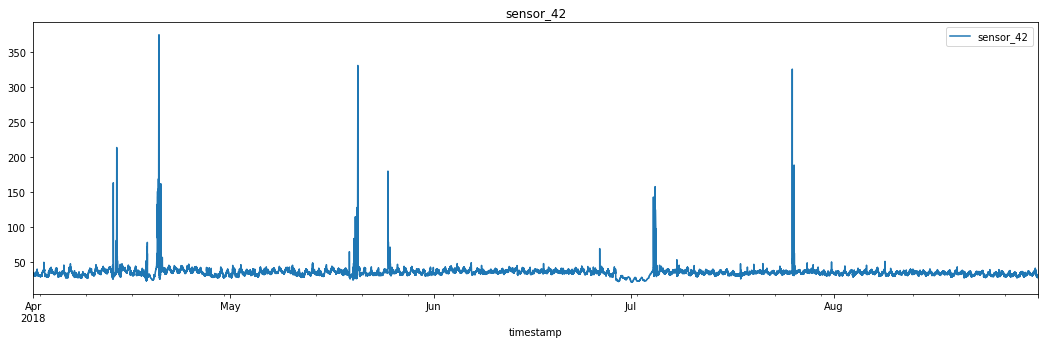

Lower range = 29.69 , Upper range = 43.23


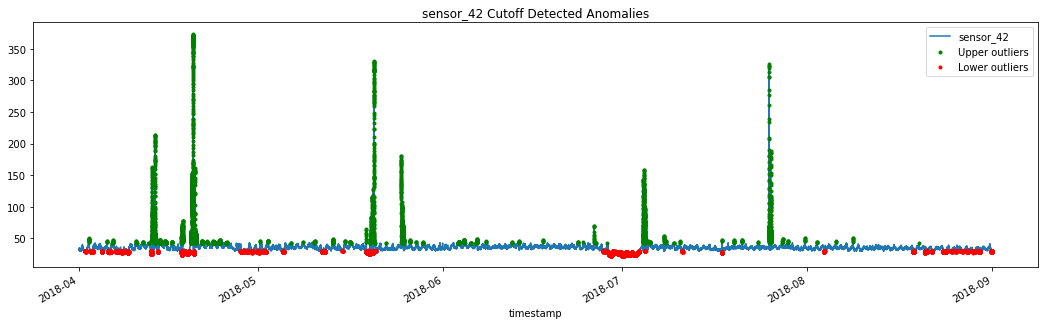

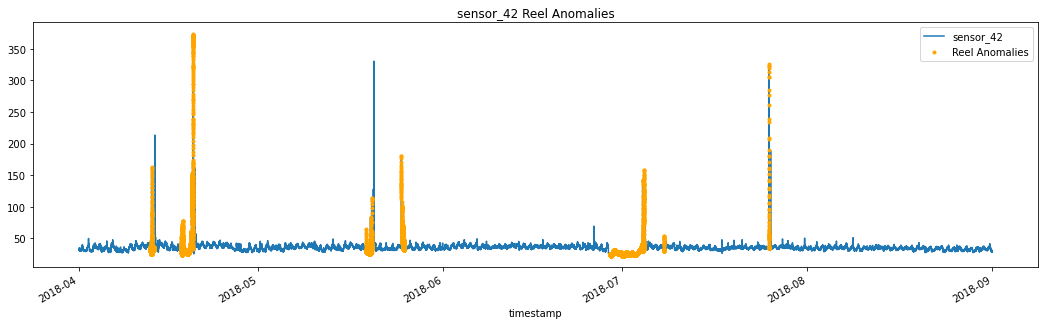

Anomalies: 14484
Anomalies by Cutoff : 17654
% Anomalies detected: 70.13%
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    205836
           1       0.58      0.70      0.63     14484

    accuracy                           0.95    220320
   macro avg       0.78      0.83      0.80    220320
weighted avg       0.95      0.95      0.95    220320

F1-score: 63.21%
Confusion matrix:
[[198339   7497]
 [  4327  10157]]
False Positive Rate: 42.47
False Negative Rate: 2.14


In [112]:
iqr_sensor_data_42=ApplyInterQuartileRange('sensor_42',sensor_42_data,0.75,1.5)

### Sensor 49

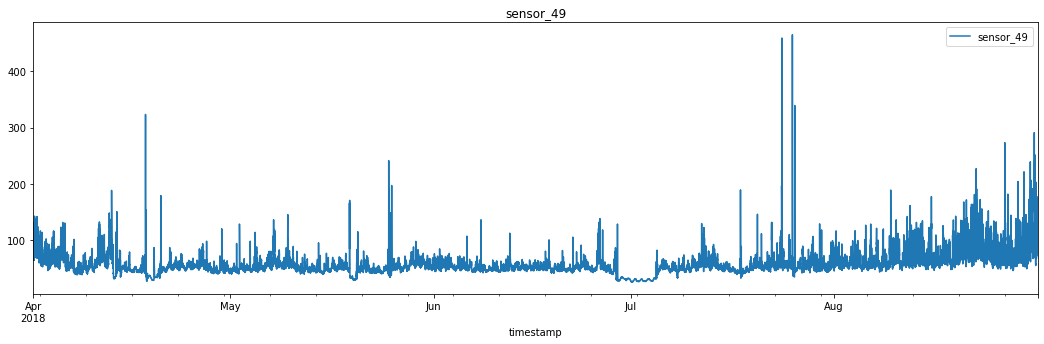

Lower range = 38.63 , Upper range = 151.91


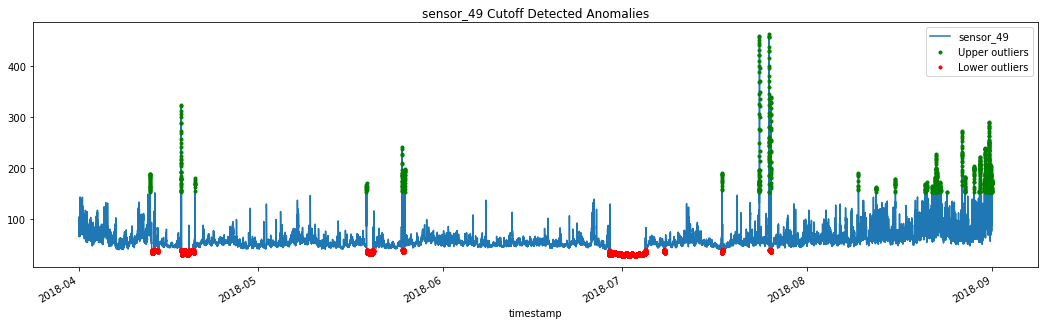

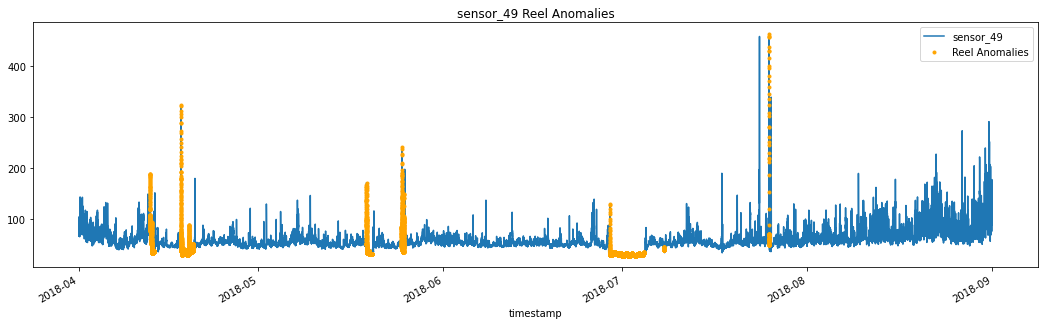

Anomalies: 14484
Anomalies by Cutoff : 15562
% Anomalies detected: 88.88%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    205836
           1       0.83      0.89      0.86     14484

    accuracy                           0.98    220320
   macro avg       0.91      0.94      0.92    220320
weighted avg       0.98      0.98      0.98    220320

F1-score: 85.70%
Confusion matrix:
[[203148   2688]
 [  1610  12874]]
False Positive Rate: 17.27
False Negative Rate: 0.79


In [113]:
iqr_sensor_data_49=ApplyInterQuartileRange('sensor_49',sensor_49_data,0.7,7)

In [114]:
results_df_round = results_df.round(2)
results_df_round.drop_duplicates(subset=['Sensor','Method'], keep='last', inplace=True)
results_df_round[results_df_round['Method'] == 'IQR'].sort_values(by=['Sensor','Method'])

Sensor Method  Accuracy     F1  Recall  Precision   FNR    FPR
14  sensor_00    IQR     91.54  60.83  100.00      43.71  0.00  56.29
15  sensor_01    IQR     97.95  83.77   80.43      87.40  1.37  12.60
16  sensor_02    IQR     95.82  73.91   90.09      62.66  0.72  37.34
17  sensor_04    IQR     99.04  93.03   97.85      88.66  0.15  11.34
18  sensor_10    IQR     98.59  90.25   99.50      82.57  0.04  17.43
19  sensor_42    IQR     94.63  63.21   70.13      57.53  2.14  42.47
20  sensor_49    IQR     98.05  85.70   88.88      82.73  0.79  17.27

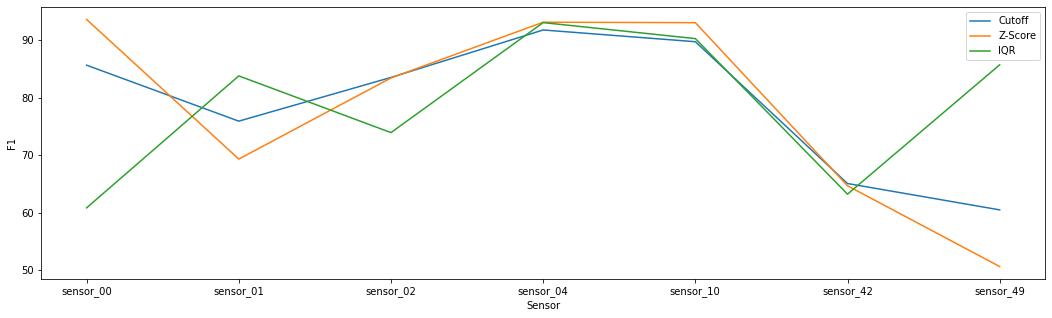

In [115]:
import seaborn as sns

sns.lineplot(x='Sensor',y='F1',hue='Method',data=results_df_round)
plt.legend(loc='upper right')

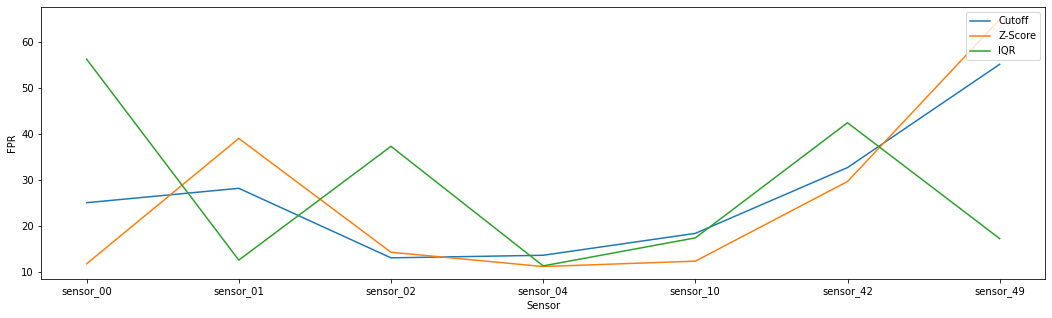

In [116]:
sns.lineplot(x='Sensor',y='FPR',hue='Method',data=results_df_round)
plt.legend(loc='upper right')

### IQR method Result Analysis 
### ------------------------------

### This method is slightly better than the cutoff and z-score method in terms of having less false positive classiffications.
### this method has the same problem as cutoff and Z-score method.( Low variance data and high bias data) can be missclassified
### Failes to detect concentraded anomalies.
### Giving that we only have 2 labels used most of the time [ NORMAL, BROKEN ], and after taking a look at the confusion matrix
### Even with high accuracy of detection we can see that the model is not able to detect the broken status most of the time we have:
- ### a high of False positives Rate on the depende of Low Negative Rate. Or
- ### a high of False negatives Rate on the depende of Low Positive Rate.
### We can detect that the model is broken while is perfeftly normal <------
### F1 score for this method ranges between ~ [0.52, 0.65]  so the classification is OK ... But Still is not very accurate for classifing anomalies.

# --------------------------------------------------

###  4.0 Local Z-Score method
- Windows Z-score method is a method that is used to detect outliers within a window of data.

In [117]:
def apply_z_score_window_method(sensor,data,window_percentage=0.1,confidence_interval=1.97):
    #plot original data
    plot_sensor(sensor,data)
    
    window_size = int(data[sensor].size*(window_percentage)//100)
    print(f'Window size = {window_size}')
    fig=plt.figure(figsize=(18,5))
    ax=fig.add_subplot(1,1,1)
    ax.plot(data[[sensor]])
    
    final = pd.DataFrame()
    outliers_z_all=pd.DataFrame()
    
    for i in range(0,len(data[sensor]),window_size):            
        if i+window_size < len(data[sensor]):
            current_data=data[[sensor,'machine_status']].iloc[i:i + window_size]
        else:
            current_data=data[[sensor,'machine_status']].iloc[i:]

        # Get mean and standard deviation ( Average of local +global)
        mean = (current_data[sensor].mean() + 1.1*data[sensor].mean())/2
        std = (current_data[sensor].std() + 1.1*data[sensor].std())/2

        # Get Z_score
        z_score = np.abs((current_data[sensor] - mean) / std) 
        
        # detect outliers
        new_data=current_data
        new_data['z_score'] =z_score
        new_data['z_score_status_l'] = 0
        mask = new_data.z_score>=confidence_interval # 95% confidence interval
        new_data.loc[mask, 'z_score_status_l'] = 1
        final= pd.concat([final,new_data])
        
        #detect and plot outliers
        outliers_z = new_data[mask][sensor]
        outliers_z_all= pd.concat([outliers_z_all,outliers_z])
        outliers_z.plot(marker='.', linestyle='none', c="r")
        
    ax.legend(loc='best', labels=[sensor,'Upper outliers', 'Lower outliers'])
    ax.set_title(sensor + ' Z-Score-Local Detected Anomalies')
    plt.show()

    plot_sensor_reel_anomalies(sensor,data)
  
    anomalies= data[data['machine_status']== 1][sensor]
    intersection = (anomalies.index).intersection(outliers_z_all.index)
    anomalies_count =anomalies.size
    anomalies_detected =outliers_z_all.size
    anomalies_detected_percentage =intersection.size*100/anomalies_count
    print('Anomalies:', anomalies_count)
    print('Anomalies by Z-score :', anomalies_detected)
    print('% Anomalies detected: {:.2f}%'. format(anomalies_detected_percentage))
    
    assesements = asses_method(final['machine_status'],final['z_score_status_l'])
    Accuracy=assesements['Accuracy']
    F1=assesements['F1']
    Recall=assesements['Recall']
    Precision=assesements['Precision']
    FNR=assesements['FNR']
    FPR=assesements['FPR']

    #Sensor','Method','Accuracy','F1','Recall','Precision','FNR','FPR'
    results_df.loc[len(results_df)] = [sensor,'Z-Score-Local',Accuracy,F1,Recall,Precision,FNR,FPR]
    return new_data

results_df=results_df[(results_df.Method != 'Z-Score-Local')]

### Sensor 00

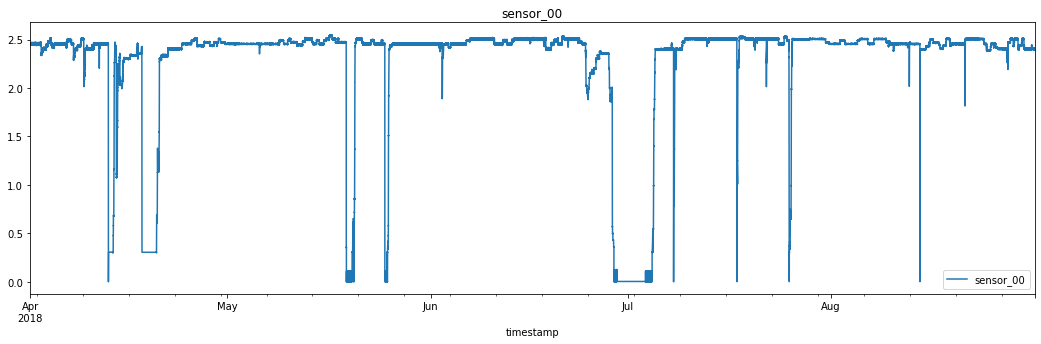

Window size = 220


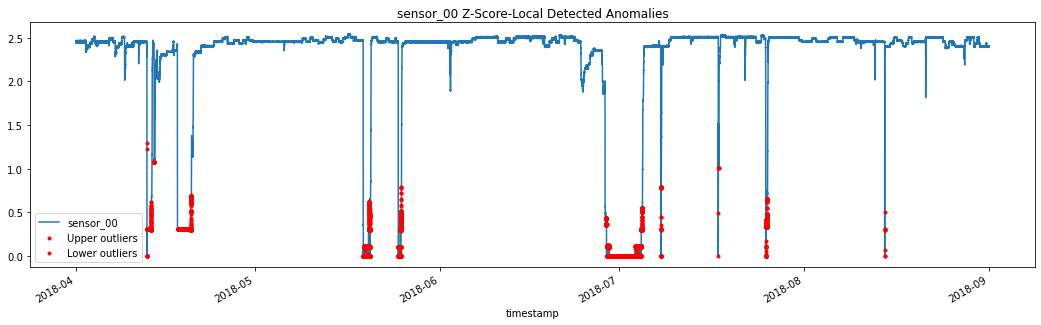

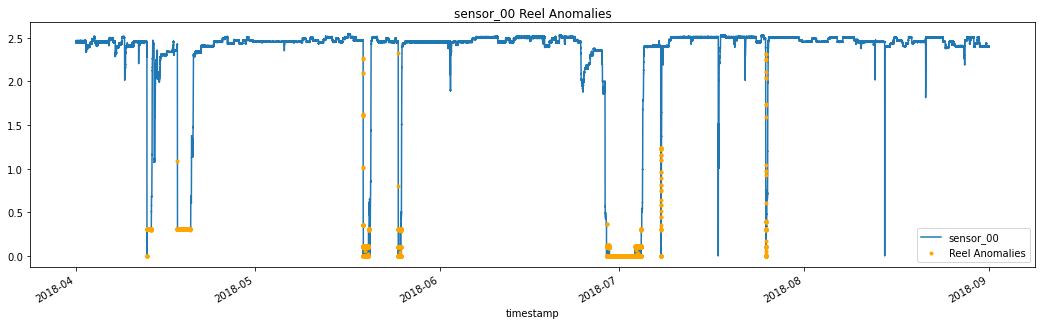

Anomalies: 14484
Anomalies by Z-score : 15872
% Anomalies detected: 97.96%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    205836
           1       0.89      0.98      0.93     14484

    accuracy                           0.99    220320
   macro avg       0.95      0.99      0.97    220320
weighted avg       0.99      0.99      0.99    220320

F1-score: 93.48%
Confusion matrix:
[[204153   1683]
 [   295  14189]]
False Positive Rate: 10.6
False Negative Rate: 0.14


In [118]:
local_z_score_sensor_data_00= apply_z_score_window_method('sensor_00',sensor_00_data,0.1,2)

### Sensor 01

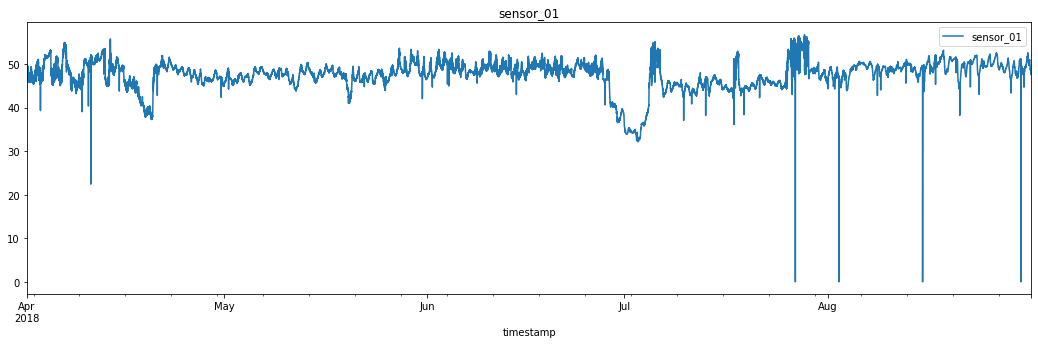

Window size = 220


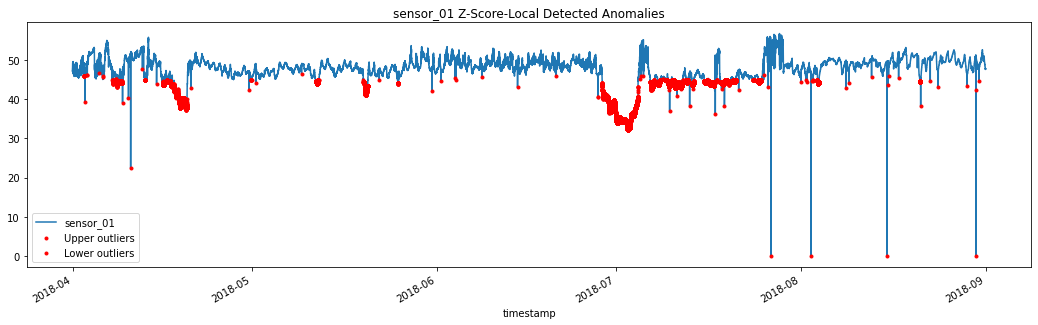

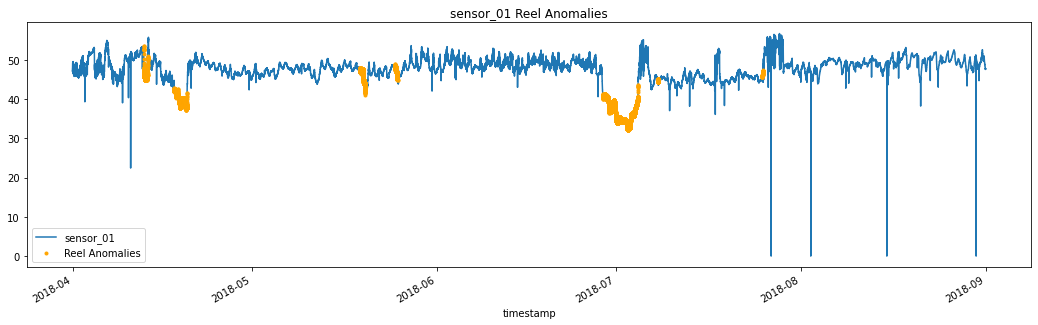

Anomalies: 14484
Anomalies by Z-score : 24830
% Anomalies detected: 81.37%
              precision    recall  f1-score   support

           0       0.99      0.94      0.96    205836
           1       0.47      0.81      0.60     14484

    accuracy                           0.93    220320
   macro avg       0.73      0.88      0.78    220320
weighted avg       0.95      0.93      0.94    220320

F1-score: 59.95%
Confusion matrix:
[[192791  13045]
 [  2699  11785]]
False Positive Rate: 52.54
False Negative Rate: 1.38


In [119]:
local_z_score_sensor_data_01= apply_z_score_window_method('sensor_01',sensor_01_data,0.1,2)

### Sensor 02

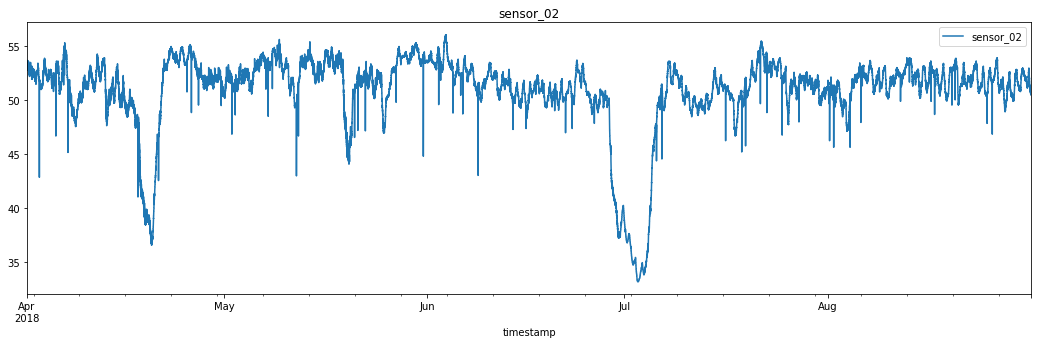

Window size = 220


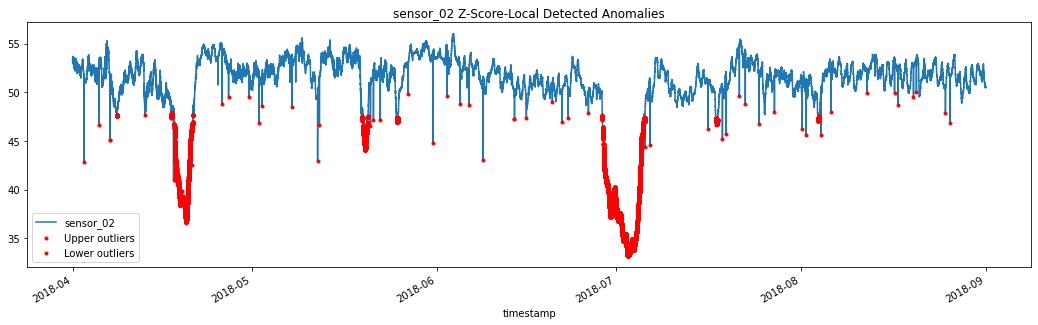

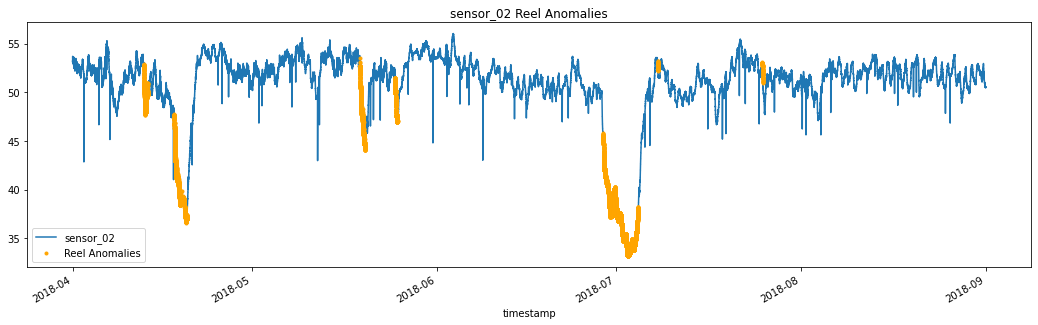

Anomalies: 14484
Anomalies by Z-score : 16868
% Anomalies detected: 83.99%
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    205836
           1       0.72      0.84      0.78     14484

    accuracy                           0.97    220320
   macro avg       0.85      0.91      0.88    220320
weighted avg       0.97      0.97      0.97    220320

F1-score: 77.60%
Confusion matrix:
[[201133   4703]
 [  2319  12165]]
False Positive Rate: 27.88
False Negative Rate: 1.14


In [120]:
local_z_score_sensor_data_02= apply_z_score_window_method('sensor_02',sensor_02_data,0.1,2)

### Sensor 04

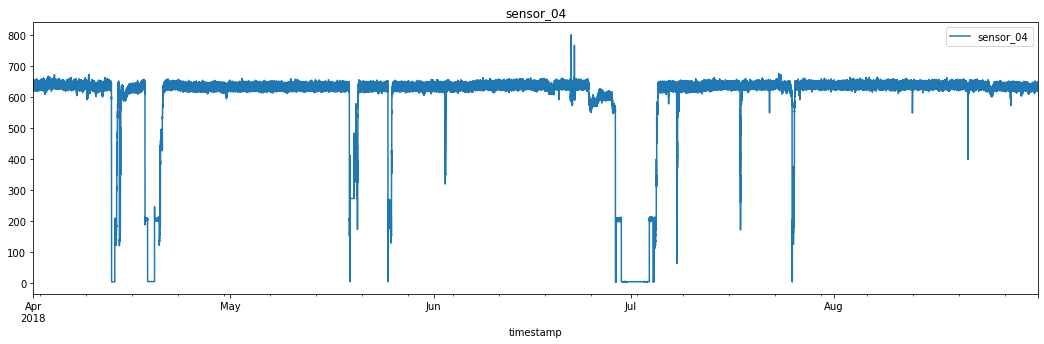

Window size = 220


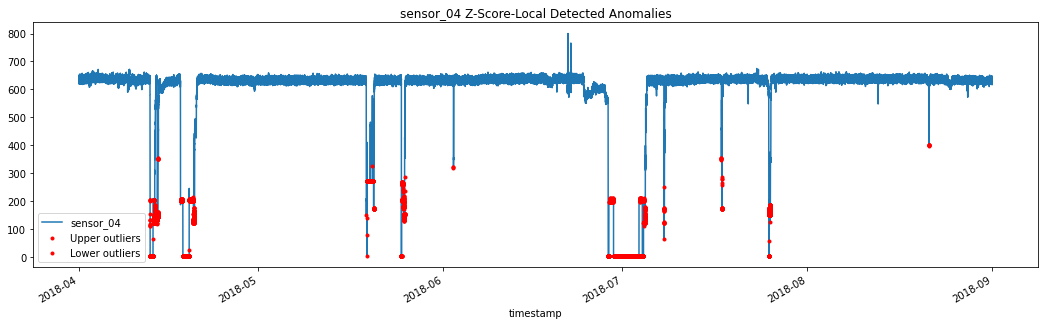

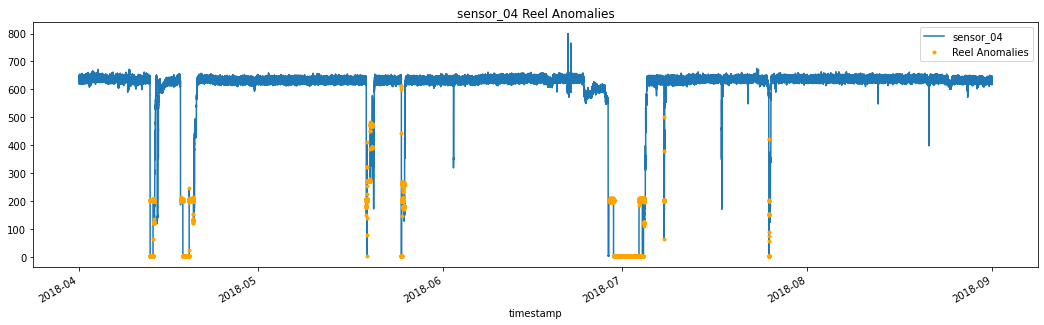

Anomalies: 14484
Anomalies by Z-score : 13891
% Anomalies detected: 85.62%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    205836
           1       0.89      0.86      0.87     14484

    accuracy                           0.98    220320
   macro avg       0.94      0.92      0.93    220320
weighted avg       0.98      0.98      0.98    220320

F1-score: 87.41%
Confusion matrix:
[[204346   1490]
 [  2083  12401]]
False Positive Rate: 10.73
False Negative Rate: 1.01


In [121]:
local_z_score_sensor_data_04= apply_z_score_window_method('sensor_04',sensor_04_data,0.1,2)

### Sensor 10

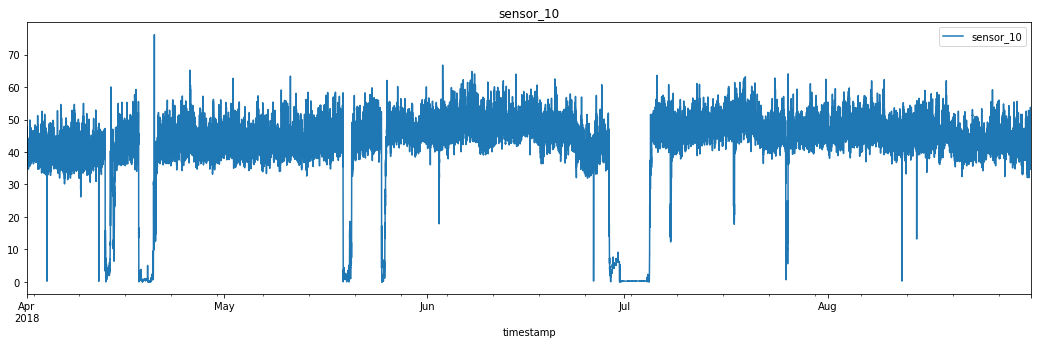

Window size = 220


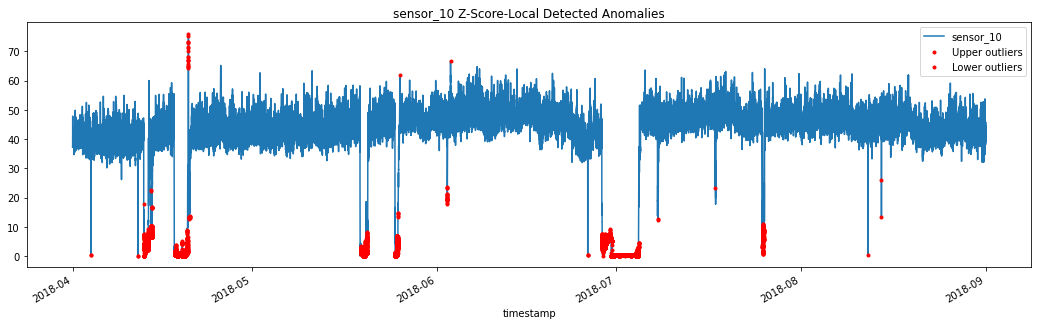

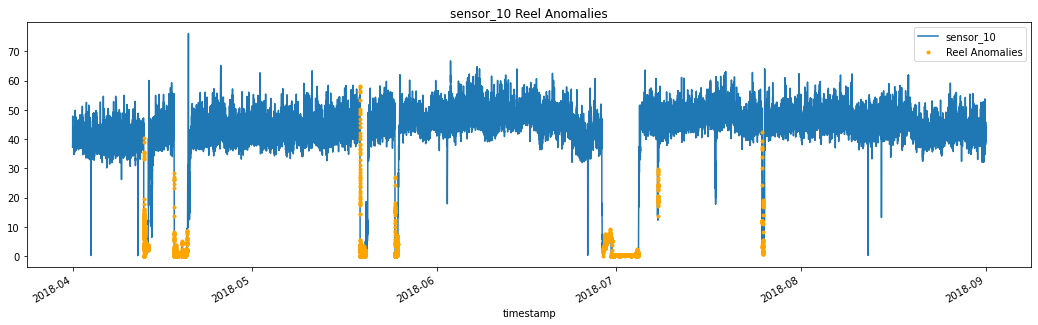

Anomalies: 14484
Anomalies by Z-score : 15148
% Anomalies detected: 96.18%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    205836
           1       0.92      0.96      0.94     14484

    accuracy                           0.99    220320
   macro avg       0.96      0.98      0.97    220320
weighted avg       0.99      0.99      0.99    220320

F1-score: 94.02%
Confusion matrix:
[[204618   1218]
 [   554  13930]]
False Positive Rate: 8.04
False Negative Rate: 0.27


In [122]:
local_z_score_sensor_data_10= apply_z_score_window_method('sensor_10',sensor_10_data,0.1,2)

### Sensor 42

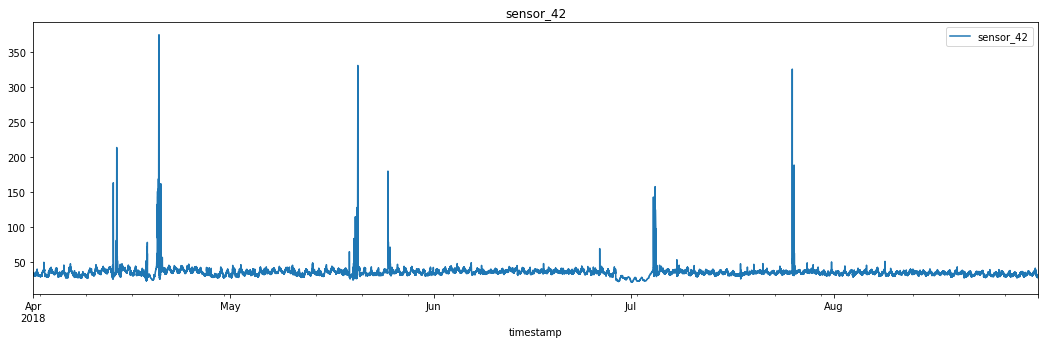

Window size = 110


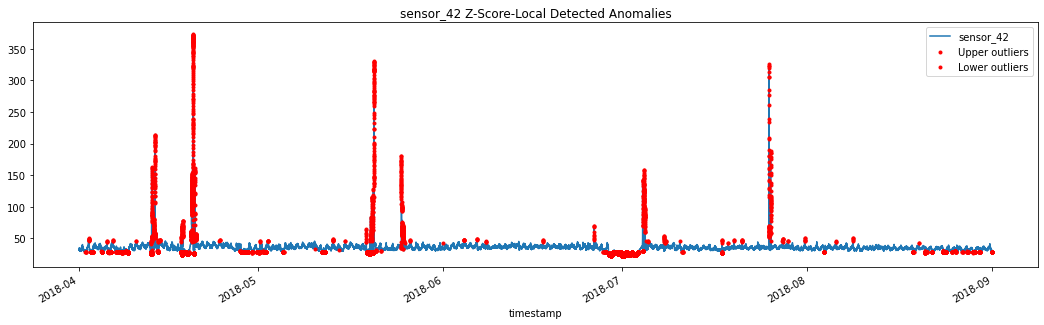

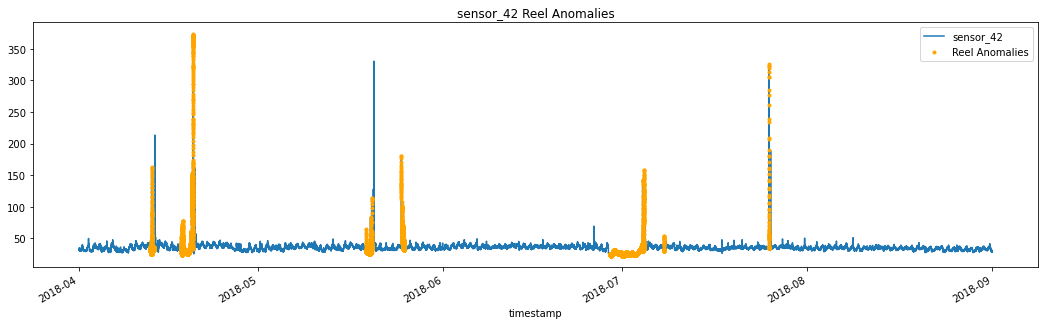

Anomalies: 14484
Anomalies by Z-score : 11383
% Anomalies detected: 59.13%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    205836
           1       0.75      0.59      0.66     14484

    accuracy                           0.96    220320
   macro avg       0.86      0.79      0.82    220320
weighted avg       0.96      0.96      0.96    220320

F1-score: 66.22%
Confusion matrix:
[[203017   2819]
 [  5920   8564]]
False Positive Rate: 24.77
False Negative Rate: 2.83


In [123]:
local_z_score_sensor_data_42= apply_z_score_window_method('sensor_42',sensor_42_data,0.05,0.9)

### Sensor 49

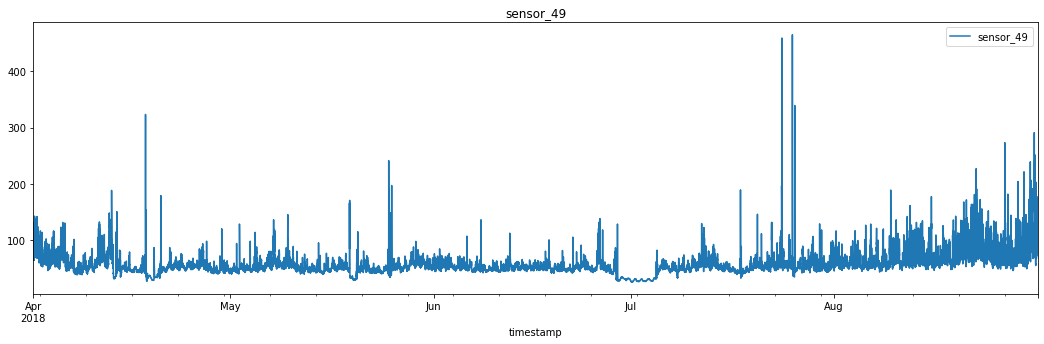

Window size = 110


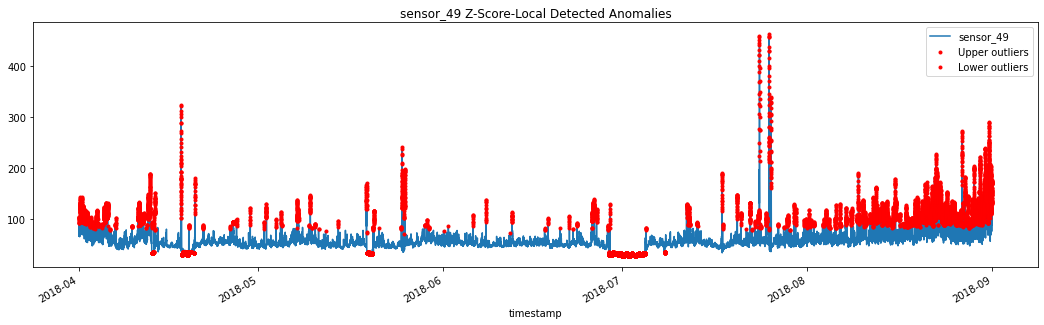

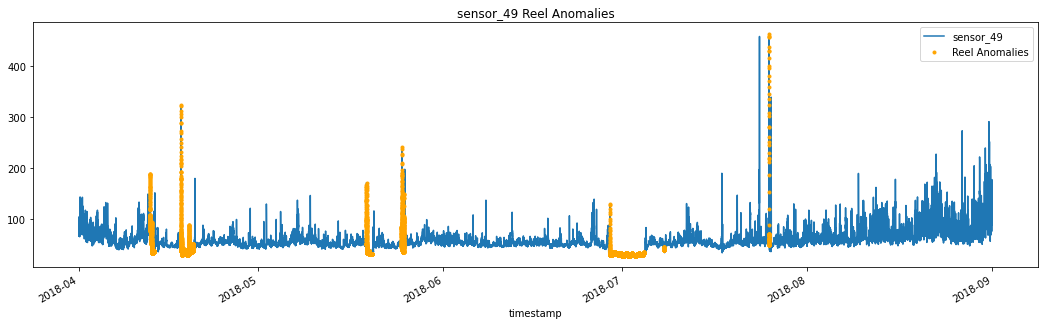

Anomalies: 14484
Anomalies by Z-score : 18588
% Anomalies detected: 70.39%
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    205836
           1       0.55      0.70      0.62     14484

    accuracy                           0.94    220320
   macro avg       0.76      0.83      0.79    220320
weighted avg       0.95      0.94      0.95    220320

F1-score: 61.65%
Confusion matrix:
[[197443   8393]
 [  4289  10195]]
False Positive Rate: 45.15
False Negative Rate: 2.13


In [124]:
local_z_score_sensor_data_49= apply_z_score_window_method('sensor_49',sensor_49_data,0.05,1.33)

In [125]:
results_df_round = results_df.round(2)
results_df_round.drop_duplicates(subset=['Sensor','Method'], keep='last', inplace=True)
results_df_round[results_df_round['Method'] == 'Z-Score-Local'].sort_values(by=['Sensor','Method'])

Sensor         Method  Accuracy     F1  Recall  Precision   FNR    FPR
21  sensor_00  Z-Score-Local     99.10  93.48   97.96      89.40  0.14  10.60
22  sensor_01  Z-Score-Local     92.85  59.95   81.37      47.46  1.38  52.54
23  sensor_02  Z-Score-Local     96.81  77.60   83.99      72.12  1.14  27.88
24  sensor_04  Z-Score-Local     98.38  87.41   85.62      89.27  1.01  10.73
25  sensor_10  Z-Score-Local     99.20  94.02   96.18      91.96  0.27   8.04
26  sensor_42  Z-Score-Local     96.03  66.22   59.13      75.23  2.83  24.77
27  sensor_49  Z-Score-Local     94.24  61.65   70.39      54.85  2.13  45.15

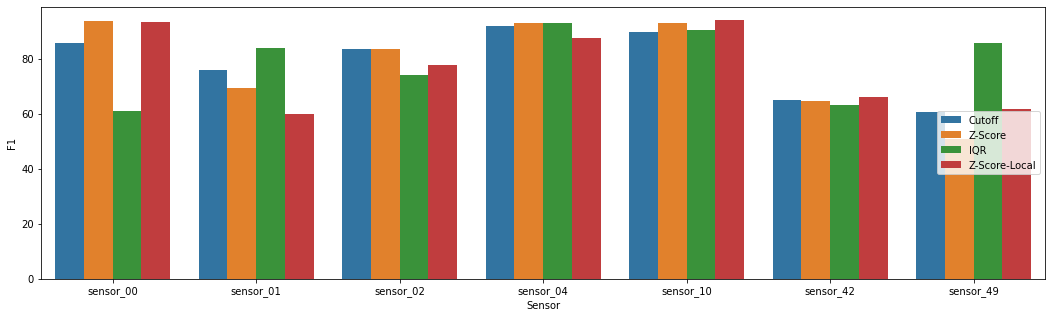

In [126]:
import seaborn as sns

sns.barplot(x='Sensor',y='F1',hue='Method',data=results_df_round)
plt.legend(loc='center right')

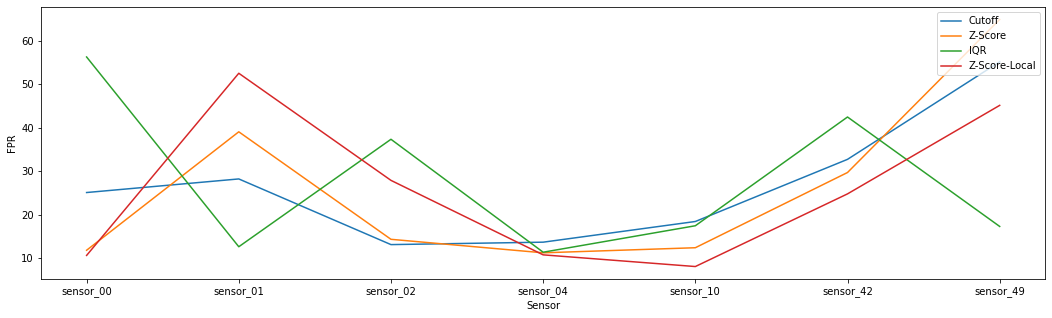

In [127]:
sns.lineplot(x='Sensor',y='FPR',hue='Method',data=results_df_round)
plt.legend(loc='upper right')

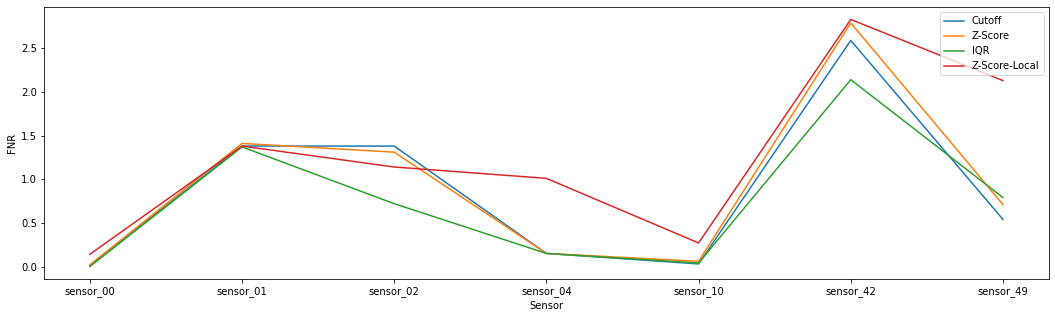

In [128]:
import seaborn as sns

sns.lineplot(x='Sensor',y='FNR',hue='Method',data=results_df_round)
plt.legend(loc='upper right')

In [129]:
results_df_round.sort_values(by=['Sensor','Method','Accuracy']).to_csv('../results/Heuristics_Results.csv')


### Z-Score-Local method Result Analysis 
### ------------------------------

### This method is slightly better than the cutoff and z-score method in terms of having way less false positive classiffications.
### this method has the same problem as cutoff and Z-score method.( Low variance data and high bias data) can be missclassified
### it works partially to detect concentraded anomalies.
### Giving that we only have 2 labels used most of the time [ NORMAL, BROKEN ], and after taking a look at the confusion matrix
### Even with high accuracy of detection we can see that the model is not able to detect the broken status most of the time we have:
- ### a high of False positives Rate on the depende of Low Negative Rate. Or
- ### a high of False negatives Rate on the depende of Low Positive Rate.
### We can detect that the model is broken while is perfeftly normal <------
### F1 score for this method ranges between ~ [0.52, 0.65]  so the classification is OK ... But Still is not very accurate for classifing anomalies.

# --------------------------------------------------